# Thinning Preprocessing

### Environment

In [1]:
import sys  
sys.path.insert(0, '/home/brunovieira/backup/Tamires_Experiments/Scripts')
import thinning_processing as tp

### Data

In [2]:
paths = {
    'data_economo': "/home/brunovieira/backup/Tamires_Experiments/Data/Economo/data_894_economo.parquet",
    'dict_economo': "/home/brunovieira/backup/Tamires_Experiments/Data/Economo/dict_economo.csv",
    'data_dkt': "/home/brunovieira/backup/Tamires_Experiments/Data/DKT/data_894_dkt.parquet", 
    'dict_dkt': "/home/brunovieira/backup/Tamires_Experiments/Data/DKT/dict_dkt.csv",
    'data_bb': "/home/brunovieira/backup/Tamires_Experiments/Data/cytoarchitecture.xlsx"}

## 1 - Build main dataset
### • Merge cytoarquitecture, anatomic and participants information

In [ ]:
def read_database(atlas, paths):
    data_economo = paths['data_economo']
    dict_econo_path = paths['dict_economo']
    data_dkt = paths['data_dkt']
    dict_dkt_path = paths['dict_dkt']
    data_bn = paths['data_BN']
    dict_bn_path = paths['dict_BN']
    bb_path = paths['data_bb']
    
    if atlas == 'Economo':
        # read df
        df = pd.read_parquet(data_economo) 
        df[['hemisphere','atlasEcono', 'handedness','sex', 'age']] = df[['hemisphere','atlasEcono', 'handedness','sex', 'age']].astype('int32')
        # add bb
        df = pp.bb_features(bb_path, df)
        df = df.dropna()
        # add name structures and lobes
        Dict_structures_econo = pd.read_csv(dict_econo_path, sep=';', header=None)
        df = df.merge(Dict_structures_econo, how='left', left_on='atlasEcono', right_on=0)
        df = df.rename(columns = {1:'lobe', 2:'structure_name'})
        df = df.drop(columns=0)
        df = df.rename(columns = {'atlasEcono':'atlas'})
        
    if atlas == 'DKT':
        # read df
        df = pd.read_parquet(data_dkt) 
        df = df[df.atlasDF != -1.0]
        df = df.rename(columns = {'h_atlasDF':'h_structure'})
        # add name structures and lobes
        Dict_structures_dkt = pd.read_csv(dict_dkt_path, sep=',', header=None)
        Dict_structures_dkt = Dict_structures_dkt.rename(columns = {2:'structure_name', 3:'lobe_name', 4:'lobe' })
        Dict_structures_dkt = Dict_structures_dkt.drop(columns=[0,1])
        df = df.join(Dict_structures_dkt, on='atlasDF')
        df = df.rename(columns = {'atlasDF':'atlas'})
        df = df[['participant', 'age', 'sex', 'handedness', 
                 'hemisphere','lobe_name', 'lobe', 'structure_name','atlas','h_structure',  
                 'bigbrain_layer_1','bigbrain_layer_2', 'bigbrain_layer_3', 
                 'bigbrain_layer_4','bigbrain_layer_5', 'bigbrain_layer_6', 
                 'area', 'curv', 'sulc','thickness']]
        
    if atlas == 'BN':
        # read df
        df = pd.read_parquet(data_bn) 
        df = df[df.atlasBN != -1.0]
        df = df.rename(columns = {'h_atlasDF':'h_structure'})
        # add name structures and lobes
        Dict_structures_dkt = pd.read_csv(dict_dkt_path, sep=',', header=None)
        Dict_structures_dkt = Dict_structures_dkt.rename(columns = {2:'structure_name', 3:'lobe_name', 4:'lobe' })
        Dict_structures_dkt = Dict_structures_dkt.drop(columns=[0,1])
        df = df.join(Dict_structures_dkt, on='atlasDF')
        df = df.rename(columns = {'atlasDF':'atlas'})
        df = df[['participant', 'age', 'sex', 'handedness', 
                 'hemisphere','lobe_name', 'lobe', 'structure_name','atlas','h_structure',  
                 'bigbrain_layer_1','bigbrain_layer_2', 'bigbrain_layer_3', 
                 'bigbrain_layer_4','bigbrain_layer_5', 'bigbrain_layer_6', 
                 'area', 'curv', 'sulc','thickness']]
    return df

In [2]:
import pandas as pd
import numpy as np
df = pd.read_parquet("/home/brunovieira/backup/Tamires_Experiments/Data/Brainnetome/data_894_BN.parquet")
df

atlasBN      area      curv      sulc  thickness participant hemisphere
0          0  0.636096 -0.005469  0.707154   0.754530   A00008326         lh
1          1  0.654399 -0.103319 -2.073836   2.891066   A00008326         lh
2          3  0.722617 -0.000505  0.482169   2.734693   A00008326         lh
3          5  0.690892 -0.069476 -4.228743   2.810716   A00008326         lh
4          7  0.674693 -0.045153 -0.830210   2.744753   A00008326         lh
..       ...       ...       ...       ...        ...         ...        ...
420      202  0.656011 -0.060400  0.926785   2.914616   A00008399         rh
421      204  0.614855 -0.085585 -4.282277   2.325515   A00008399         rh
422      206  0.657374 -0.037457 -2.196608   2.484414   A00008399         rh
423      208  0.623623 -0.054351 -2.424142   2.382009   A00008399         rh
424      210  0.641828 -0.001724  3.543024   2.476721   A00008399         rh

[425 rows x 7 columns]

In [ ]:
# dados do sujeito
# lobulo e hemisferio
# atlas e nome estrutura
# bb porcentagem e espessura
# dados funcionais

In [3]:
df = tp.read_database('DKT', paths)
df

participant   age  sex  handedness  hemisphere  lobe_name  lobe  \
1       A00008326  59.0  0.0         2.0         0.0   Parietal   5.0   
2       A00008326  59.0  0.0         2.0         0.0  Occipital   4.0   
3       A00008326  59.0  0.0         2.0         0.0    Frontal   1.0   
4       A00008326  59.0  0.0         2.0         0.0  Occipital   4.0   
5       A00008326  59.0  0.0         2.0         0.0    Frontal   1.0   
...           ...   ...  ...         ...         ...        ...   ...   
54869   A00074034  10.0  0.0         2.0         1.0  Occipital   4.0   
54870   A00074034  10.0  0.0         2.0         1.0   Temporal   6.0   
54871   A00074034  10.0  0.0         2.0         1.0   Temporal   6.0   
54872   A00074034  10.0  0.0         2.0         1.0   Parietal   5.0   
54873   A00074034  10.0  0.0         2.0         1.0   Temporal   6.0   

               structure_name  atlas h_structure  bigbrain_layer_1  \
1           Isthmus Cingulate   10.0         010          0.109474   
2           Lateral Occipital   11.0         011          0.111468   
3      Lateral Orbito Frontal   12.0         012          0.105876   
4                     Lingual   13.0         013          0.113680   
5       Medial Orbito Frontal   14.0         014          0.115373   
...                       ...    ...         ...               ...   
54869                  Cuneus    5.0          15          0.113255   
54870              Entorhinal    6.0          16          0.102740   
54871                Fusiform    7.0          17          0.107814   
54872       Inferior Parietal    8.0          18          0.107288   
54873       Inferior Temporal    9.0          19          0.105558   

       bigbrain_layer_2  bigbrain_layer_3  bigbrain_layer_4  bigbrain_layer_5  \
1              0.085556          0.277775          0.103513          0.205281   
2              0.097686          0.282431          0.106553          0.197702   
3              0.084844          0.277359          0.068916          0.221491   
4              0.093940          0.274428          0.130979          0.186600   
5              0.091310          0.273685          0.076120          0.214898   
...                 ...               ...               ...               ...   
54869          0.097087          0.281747          0.114399          0.192047   
54870          0.095890          0.294521          0.071918          0.226027   
54871          0.092227          0.278959          0.091529          0.216125   
54872          0.094358          0.286897          0.088119          0.210177   
54873          0.092448          0.278421          0.087123          0.220677   

       bigbrain_layer_6      area      curv      sulc  thickness  
1              0.218400  0.601876 -0.008262  0.125957   2.703677  
2              0.204160  0.656662 -0.042081 -2.089579   2.515563  
3              0.241514  0.673776 -0.049637 -1.078827   2.724164  
4              0.200373  0.682724 -0.029710 -0.314644   1.864753  
5              0.228614  0.667584 -0.043280 -2.774555   2.320056  
...                 ...       ...       ...       ...        ...  
54869          0.201465  0.612191 -0.076858 -2.278778   2.362472  
54870          0.208904  0.743309 -0.054838 -4.678692   3.448317  
54871          0.213346  0.669733 -0.060874  1.066757   3.026673  
54872          0.213161  0.683689 -0.043937  0.511255   2.803049  
54873          0.215773  0.659898 -0.081408 -0.644637   3.159884  

[54003 rows x 20 columns]

### • What is annual thinning rates for each cortical structure in each age?

In [4]:
taxa_anual = tp.reg_polynomial(df) 
taxa_anual

1         2         3         4         5         6         7    \
atlas                                                                         
010    0.030900  0.029727  0.028577  0.027450  0.026347  0.025267  0.024209   
011    0.020242  0.019423  0.018621  0.017834  0.017064  0.016311  0.015573   
012    0.037021  0.035603  0.034212  0.032848  0.031510  0.030199  0.028915   
013    0.021226  0.020432  0.019652  0.018888  0.018139  0.017404  0.016685   
014    0.034183  0.032914  0.031670  0.030449  0.029253  0.028080  0.026931   
...         ...       ...       ...       ...       ...       ...       ...   
15     0.023250  0.022434  0.021632  0.020845  0.020073  0.019315  0.018571   
16     0.009748  0.008985  0.008244  0.007524  0.006827  0.006151  0.005497   
17     0.029173  0.028018  0.026886  0.025777  0.024692  0.023629  0.022590   
18     0.035976  0.034597  0.033246  0.031923  0.030627  0.029359  0.028118   
19     0.025857  0.024862  0.023887  0.022931  0.021995  0.021078  0.020180   

            8         9         10   ...       91        92        93   \
atlas                                ...                                 
010    0.023175  0.022165  0.021177  ...  0.018147  0.019059  0.019995   
011    0.014852  0.014148  0.013460  ...  0.011967  0.012618  0.013286   
012    0.027658  0.026427  0.025223  ...  0.016427  0.017414  0.018427   
013    0.015981  0.015292  0.014618  ...  0.010166  0.010730  0.011309   
014    0.025805  0.024704  0.023626  ...  0.015411  0.016286  0.017184   
...         ...       ...       ...  ...       ...       ...       ...   
15     0.017841  0.017126  0.016426  ...  0.007535  0.008016  0.008512   
16     0.004865  0.004254  0.003666  ...  0.028348  0.029546  0.030766   
17     0.021574  0.020581  0.019611  ...  0.017979  0.018909  0.019862   
18     0.026905  0.025719  0.024561  ...  0.022256  0.023357  0.024486   
19     0.019301  0.018442  0.017602  ...  0.013684  0.014427  0.015189   

            94        95        96        97        98        99        100  
atlas                                                                        
010    0.020954  0.021937  0.022942  0.023971  0.025023  0.026098  0.027196  
011    0.013970  0.014671  0.015387  0.016120  0.016870  0.017636  0.018418  
012    0.019467  0.020534  0.021628  0.022748  0.023895  0.025069  0.026269  
013    0.011903  0.012513  0.013137  0.013776  0.014431  0.015100  0.015785  
014    0.018107  0.019053  0.020023  0.021017  0.022035  0.023076  0.024142  
...         ...       ...       ...       ...       ...       ...       ...  
15     0.009022  0.009546  0.010085  0.010638  0.011205  0.011787  0.012384  
16     0.032008  0.033271  0.034557  0.035864  0.037192  0.038543  0.039915  
17     0.020837  0.021836  0.022858  0.023904  0.024972  0.026064  0.027179  
18     0.025642  0.026826  0.028037  0.029276  0.030543  0.031837  0.033159  
19     0.015971  0.016772  0.017593  0.018432  0.019291  0.020170  0.021067  

[63 rows x 100 columns]

### • Merge annual thinning rates

In [5]:
df1 = tp.build_main_dataframe(df, taxa_anual)
df1

Age    Gender  handedness  Hemisphere  Lobe  atlas  bigbrain_layer_1  \
0      6.0  0.714286    1.857143         0.0   5.0   10.0          0.108929   
1      7.0  0.000000    1.666667         0.0   5.0   10.0          0.109105   
2      8.0  0.333333    1.666667         0.0   5.0   10.0          0.108496   
3      9.0  0.357143    1.642857         0.0   5.0   10.0          0.108857   
4     10.0  0.500000    1.833333         0.0   5.0   10.0          0.108566   
...    ...       ...         ...         ...   ...    ...               ...   
4955  81.0  0.500000    2.000000         1.0   6.0    9.0          0.105657   
4956  82.0  1.000000    2.000000         1.0   6.0    9.0          0.105584   
4957  83.0  0.200000    2.000000         1.0   6.0    9.0          0.105624   
4958  84.0  1.000000    1.500000         1.0   6.0    9.0          0.105564   
4959  85.0  0.000000    2.000000         1.0   6.0    9.0          0.105674   

      bigbrain_layer_2  bigbrain_layer_3  bigbrain_layer_4  ...  \
0             0.086125          0.280021          0.097536  ...   
1             0.085927          0.279501          0.098815  ...   
2             0.086202          0.280989          0.093905  ...   
3             0.085912          0.279355          0.099071  ...   
4             0.086038          0.279964          0.097067  ...   
...                ...               ...               ...  ...   
4955          0.092518          0.278815          0.087126  ...   
4956          0.092857          0.279808          0.086549  ...   
4957          0.092559          0.278931          0.087005  ...   
4958          0.092404          0.279213          0.086499  ...   
4959          0.092519          0.278434          0.087454  ...   

      thickness_mean  Layer I thickness  Layer II thickness  \
0               2.47           0.292839            0.231539   
1               2.47           0.295757            0.232931   
2               2.47           0.302858            0.240630   
3               2.47           0.294364            0.232329   
4               2.47           0.303497            0.240450   
...              ...                ...                 ...   
4955            2.89           0.299190            0.261975   
4956            2.89           0.308444            0.271265   
4957            2.89           0.285630            0.250293   
4958            2.89           0.290185            0.254030   
4959            2.89           0.301389            0.263872   

      Layer III thickness  Layer IV thickness  Layer V thickness  \
0                0.752844            0.262077           0.558708   
1                0.757627            0.268048           0.561925   
2                0.784351            0.262117           0.584899   
3                0.755479            0.267688           0.560518   
4                0.782382            0.271640           0.581627   
...                   ...                 ...                ...   
4955             0.789476            0.246746           0.624235   
4956             0.817406            0.252836           0.643823   
4957             0.754266            0.235290           0.596252   
4958             0.767540            0.237791           0.607210   
4959             0.794110            0.249425           0.628372   

      Layer VI thickness  sum_thickness_layers  h_structure     structure_name  
0               0.590390              2.688395          010  Isthmus Cingulate  
1               0.594546              2.710835          010  Isthmus Cingulate  
2               0.616479              2.791334          010  Isthmus Cingulate  
3               0.593732              2.704111          010  Isthmus Cingulate  
4               0.615349              2.794945          010  Isthmus Cingulate  
...                  ...                   ...          ...                ...  
4955            0.610048              2.831671           19  Inferior Temporal  
4956            0.627534       

## 2 - Plots


### •  Age histogram and Thinning Trend.

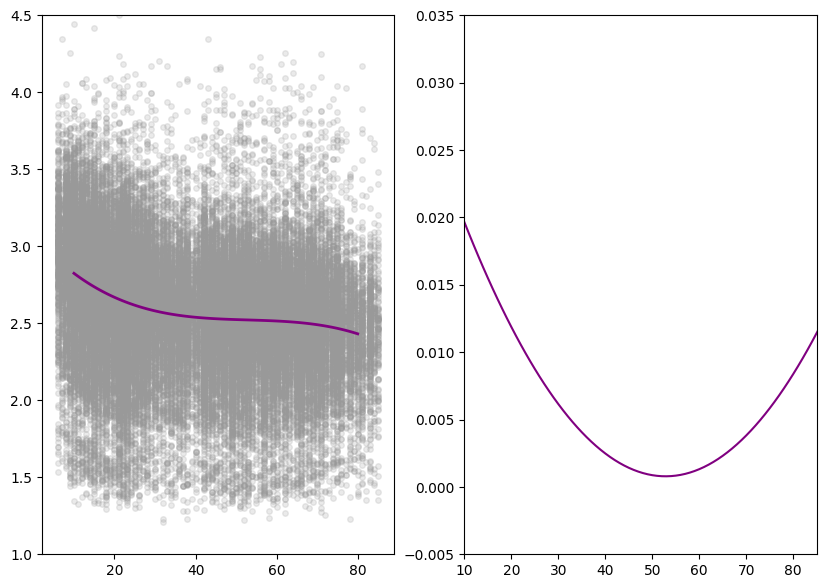

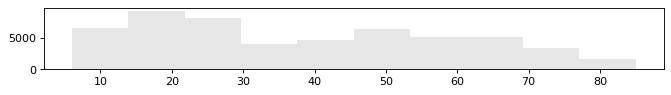

In [6]:
tp.plot_avarage_thinning_rates(df)

### •  How each cortical structure thin?

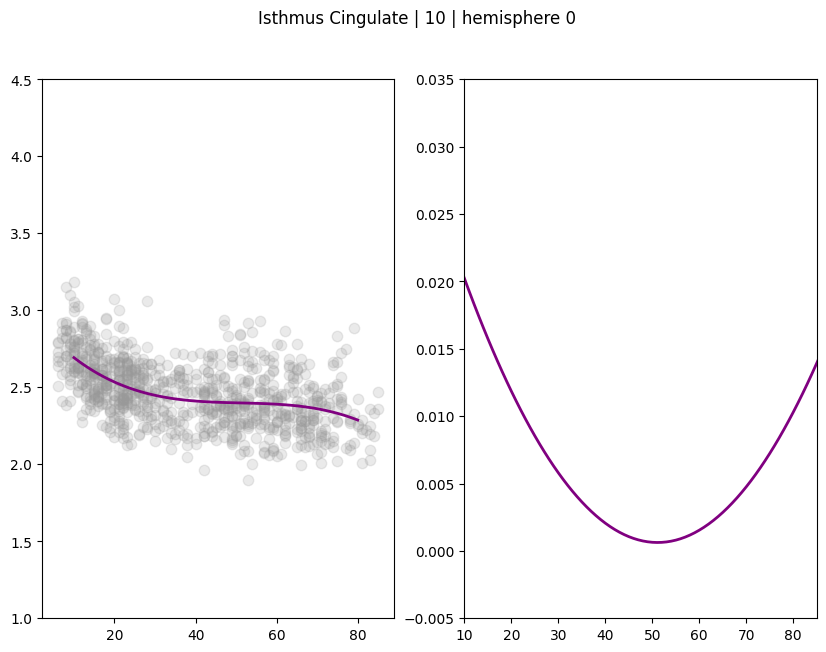

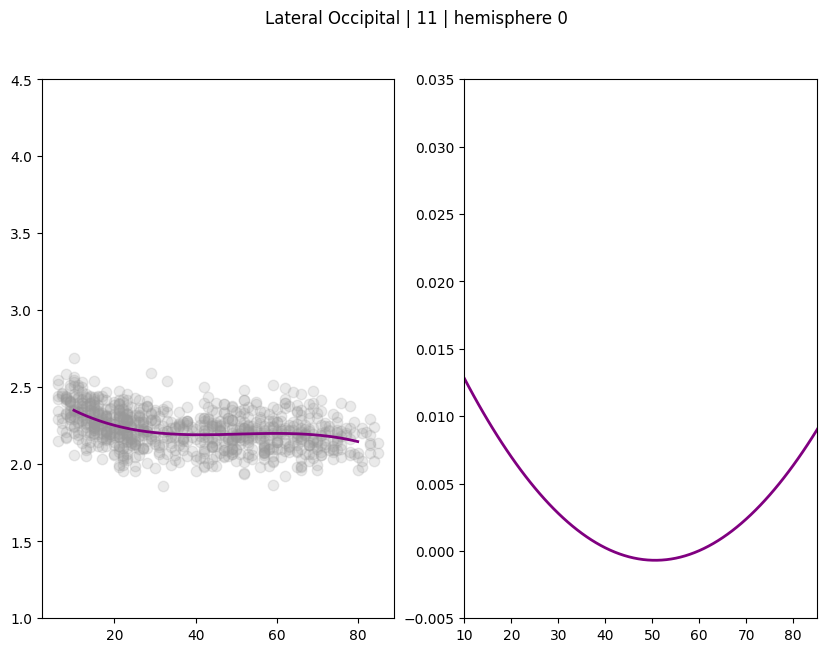

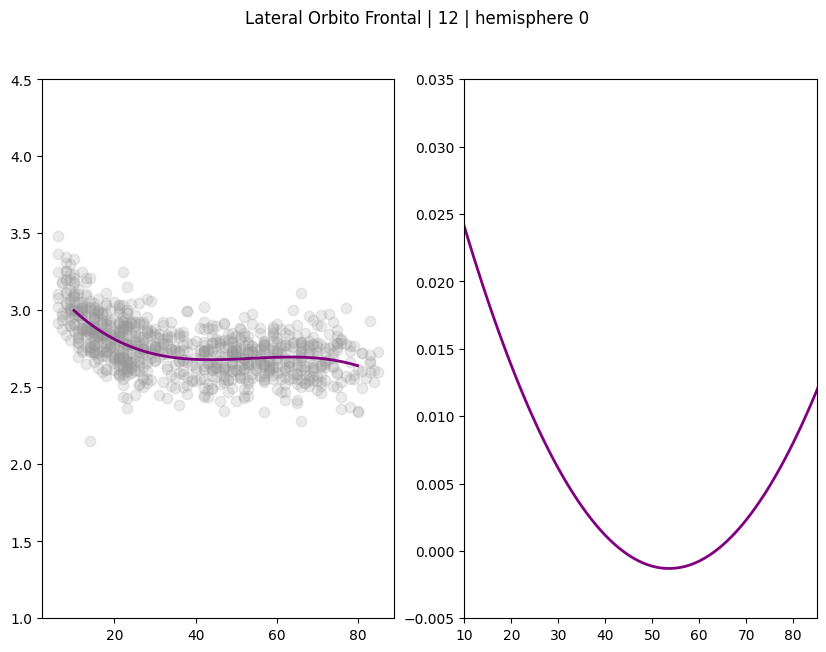

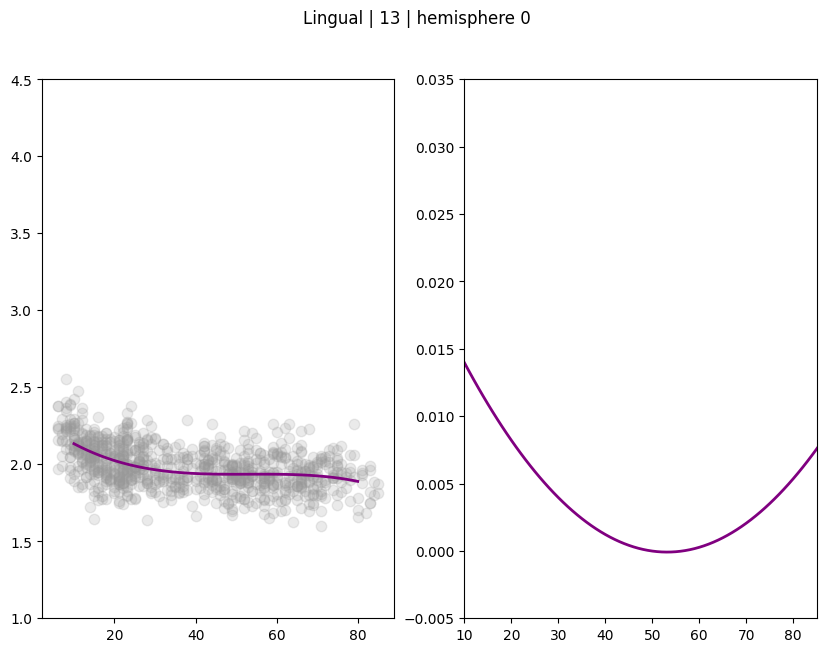

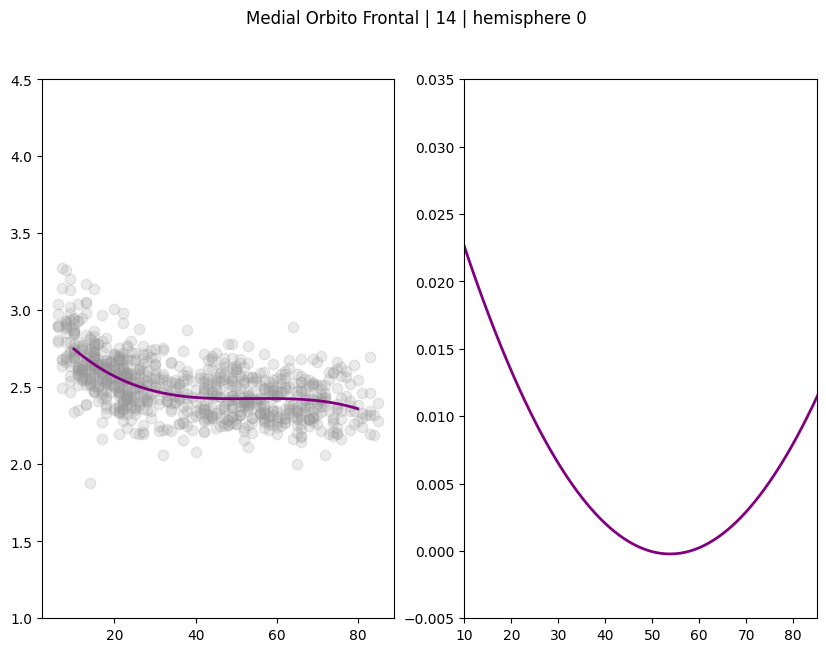

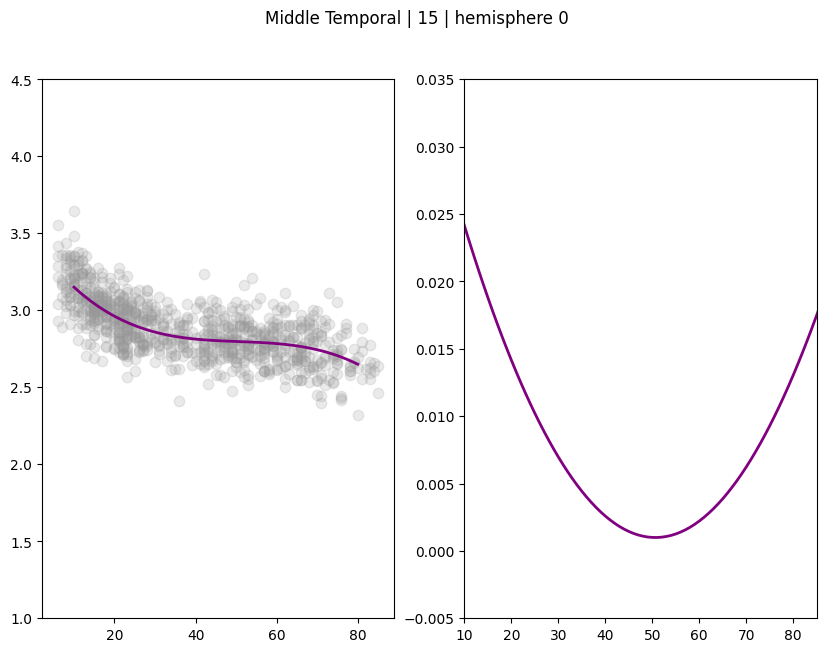

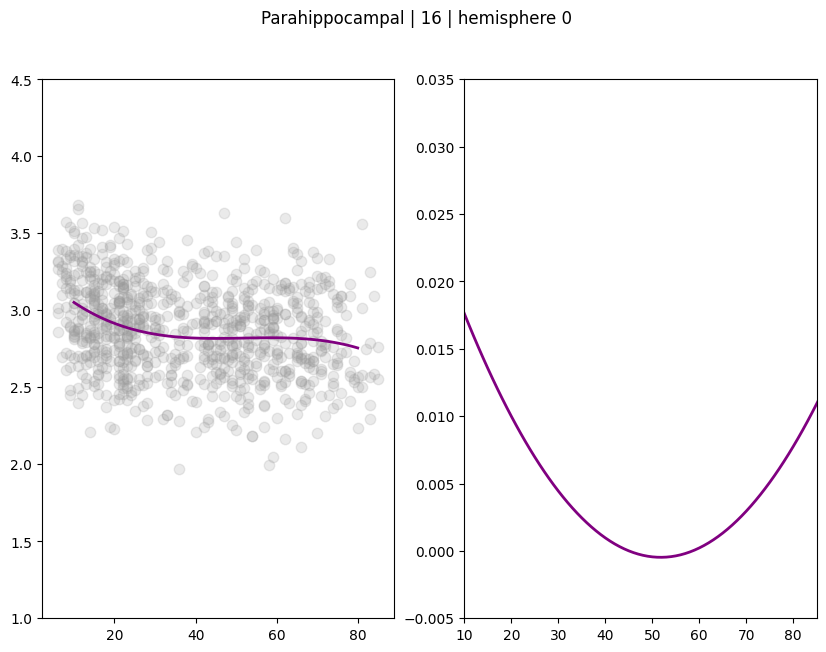

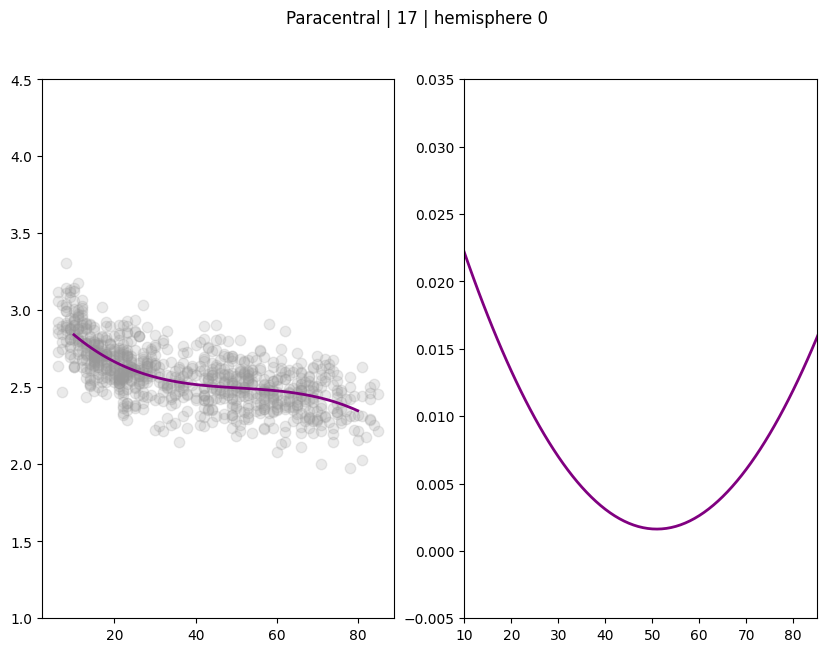

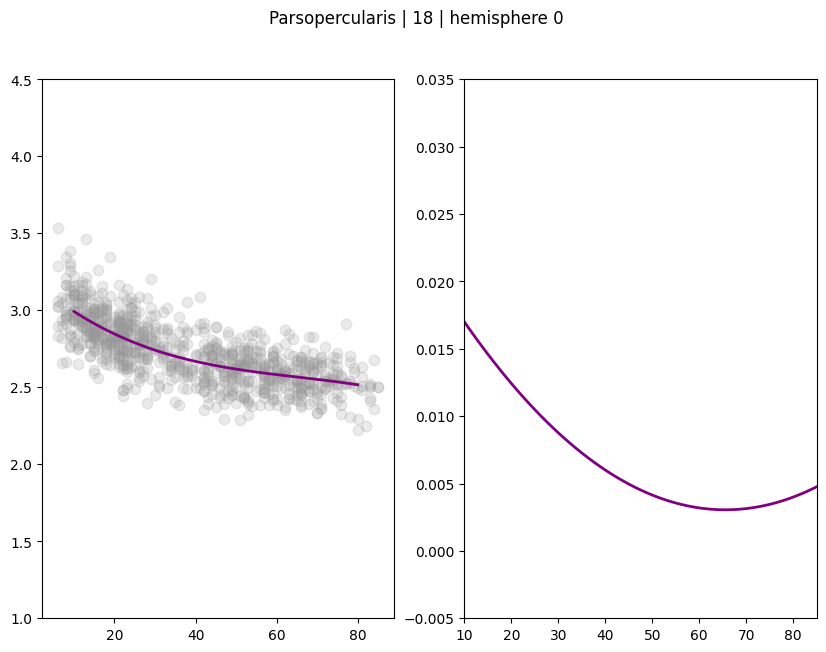

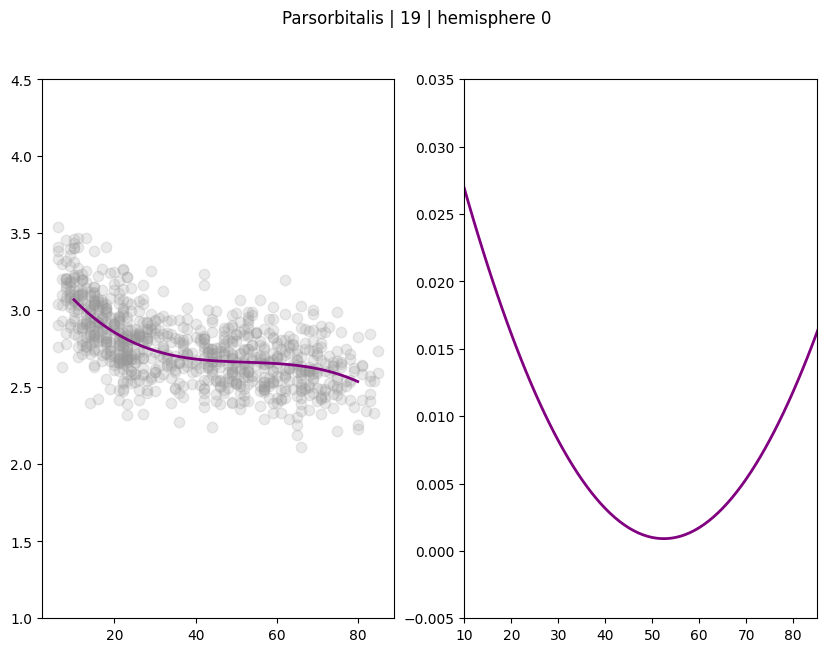

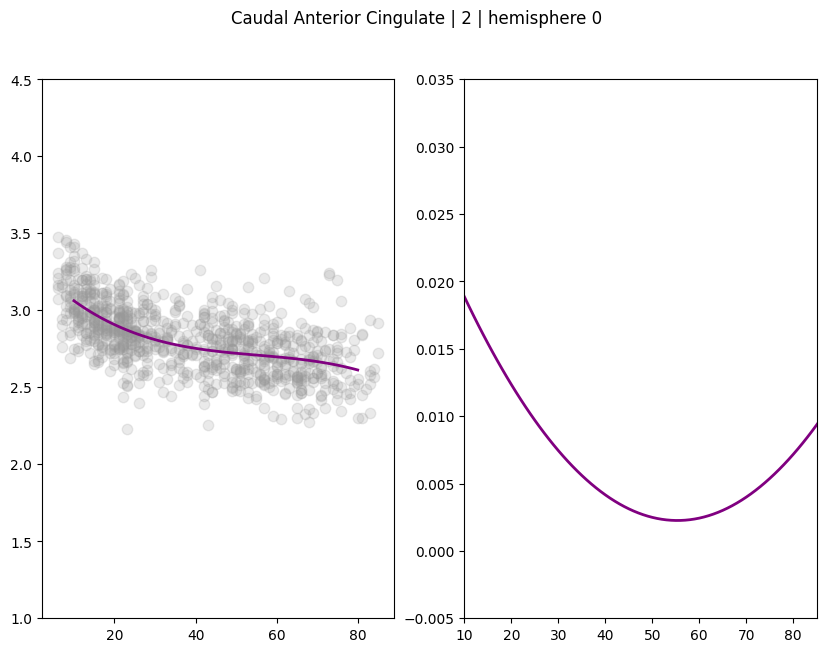

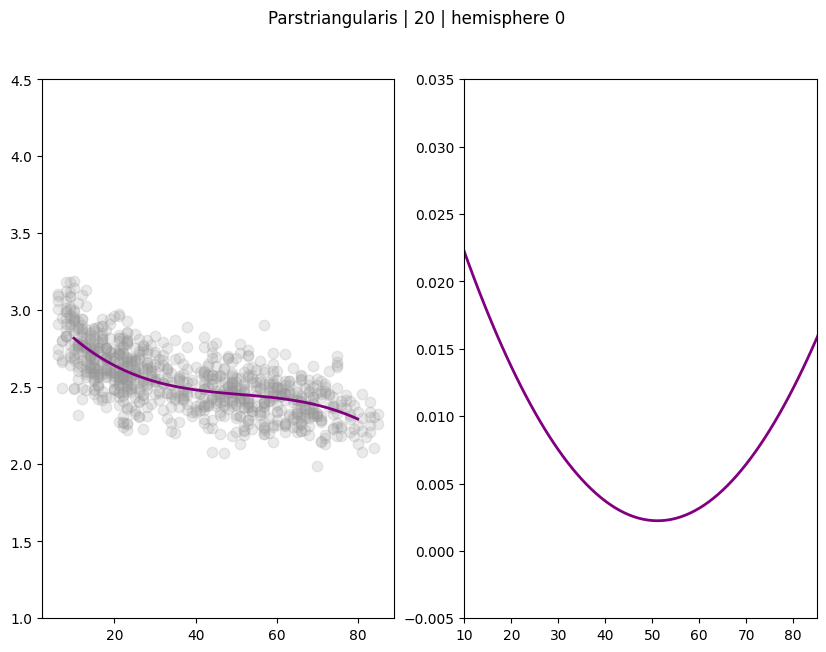

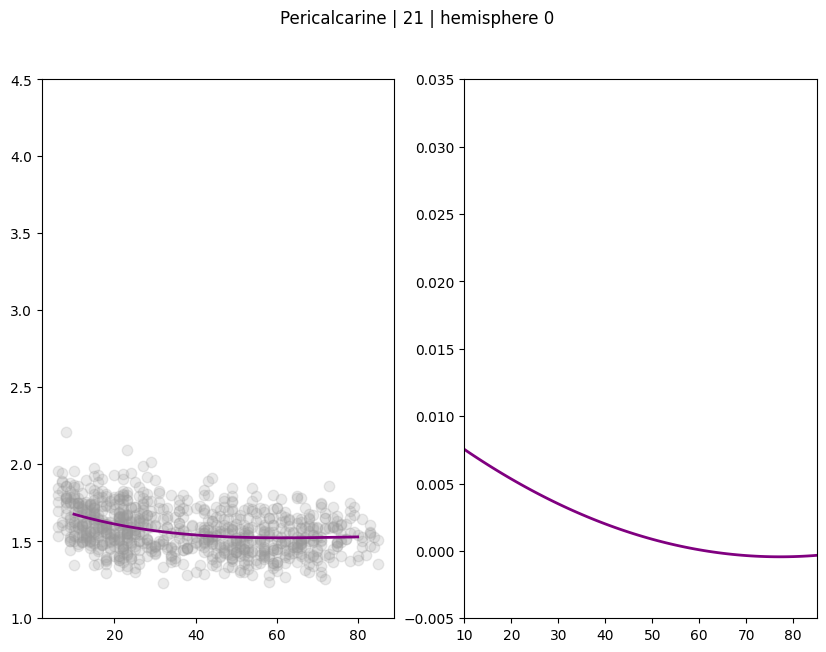

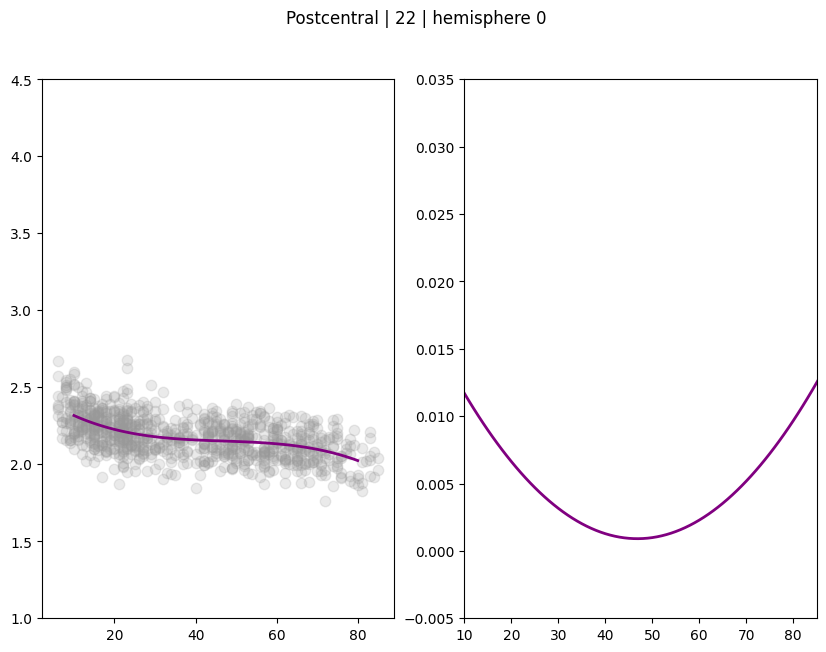

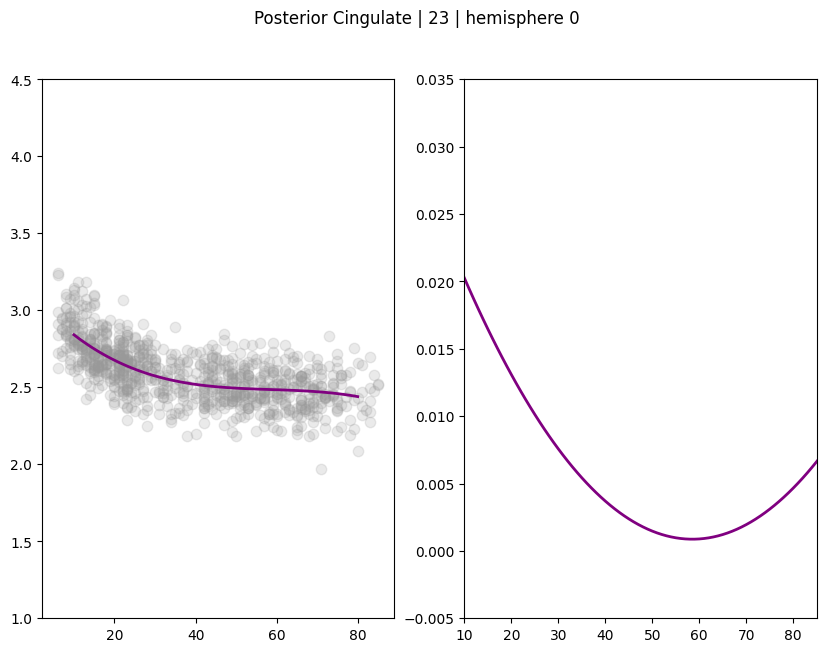

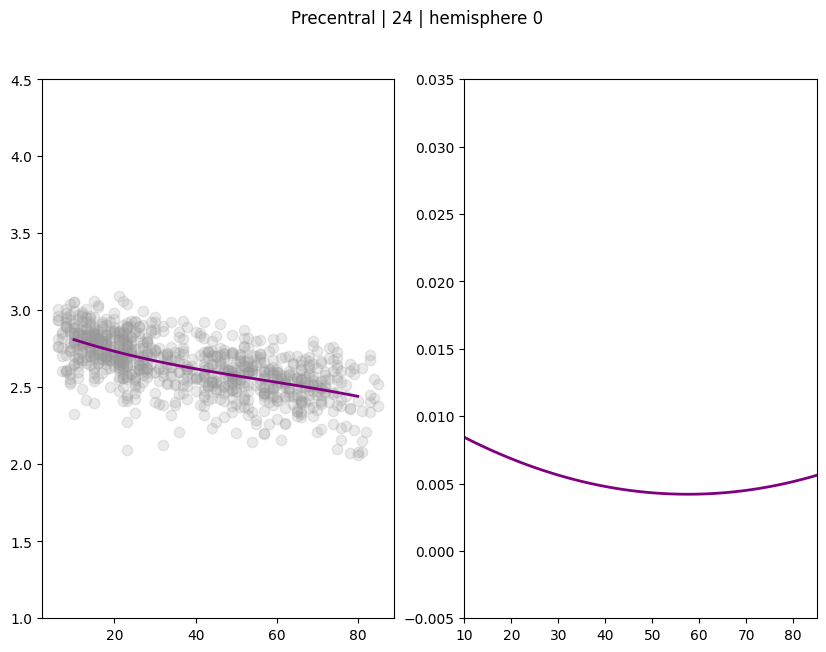

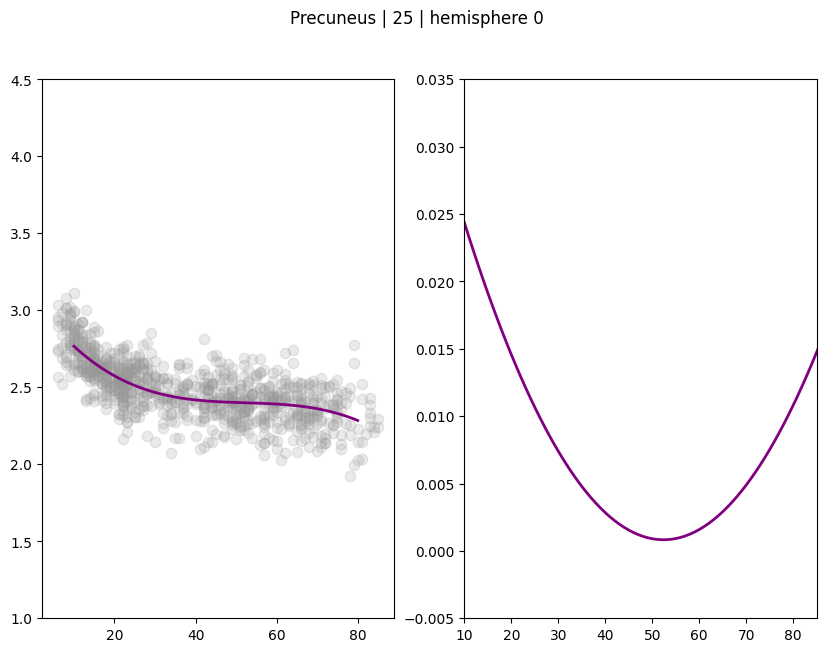

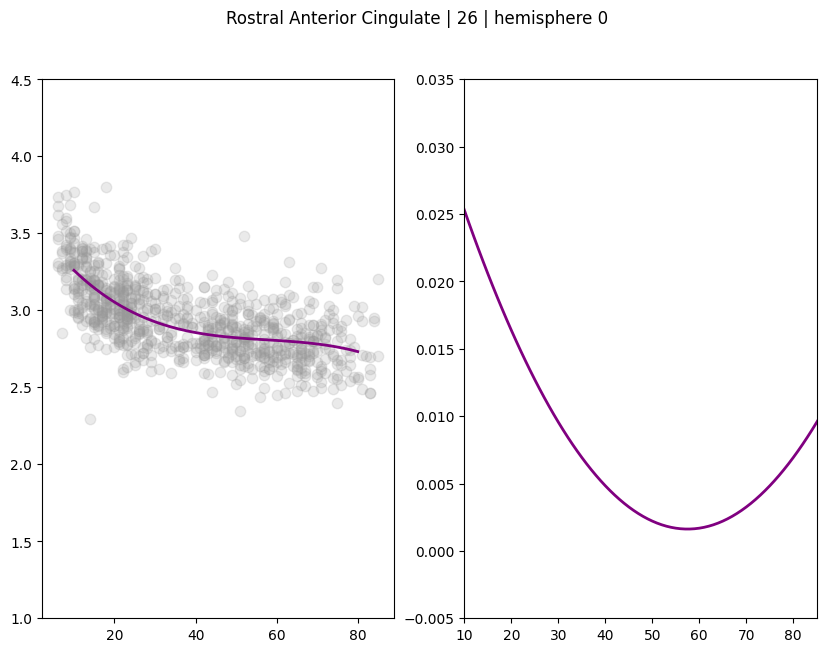

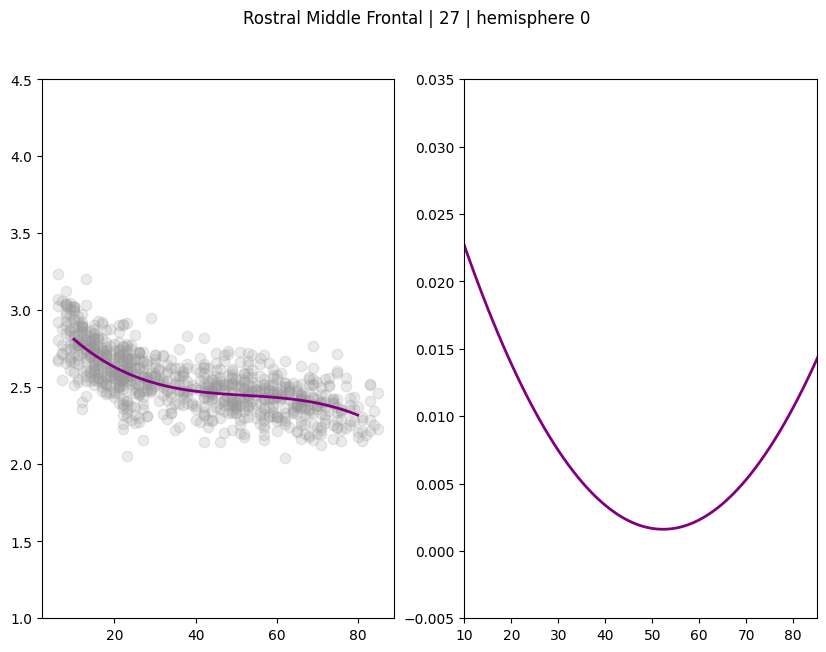

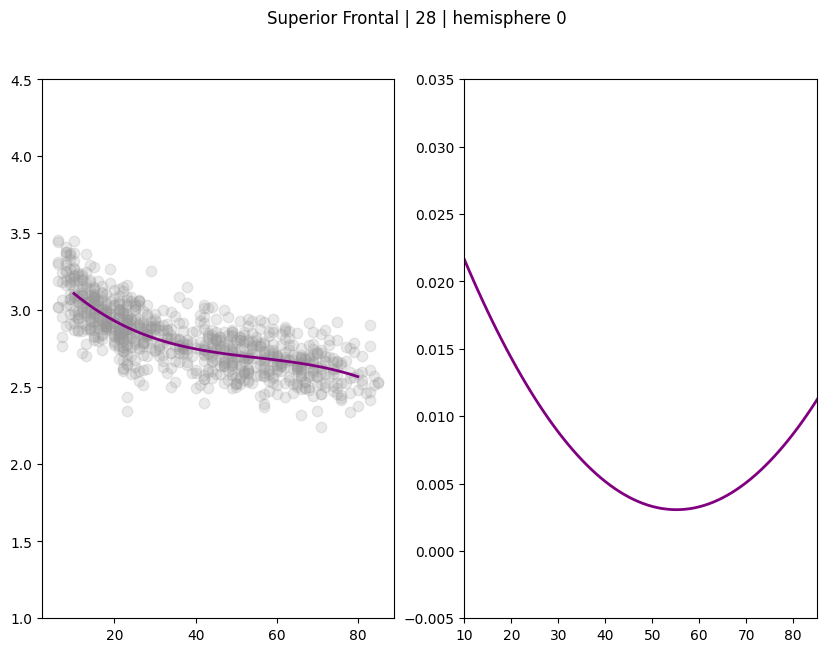

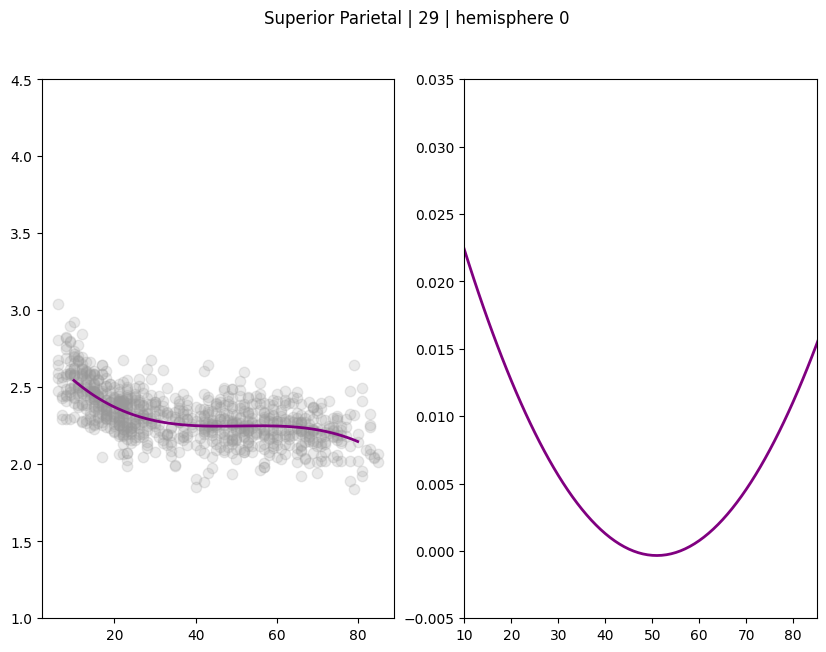

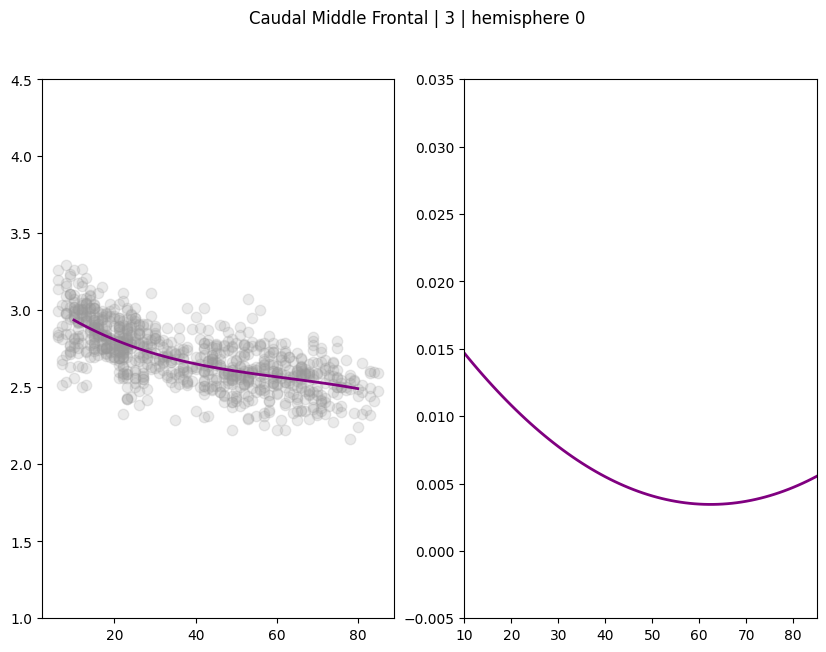

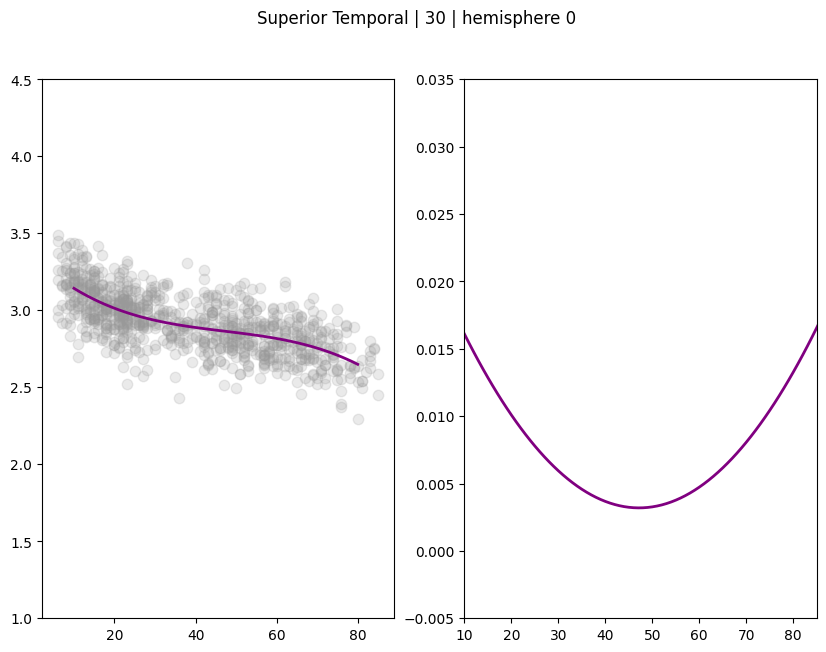

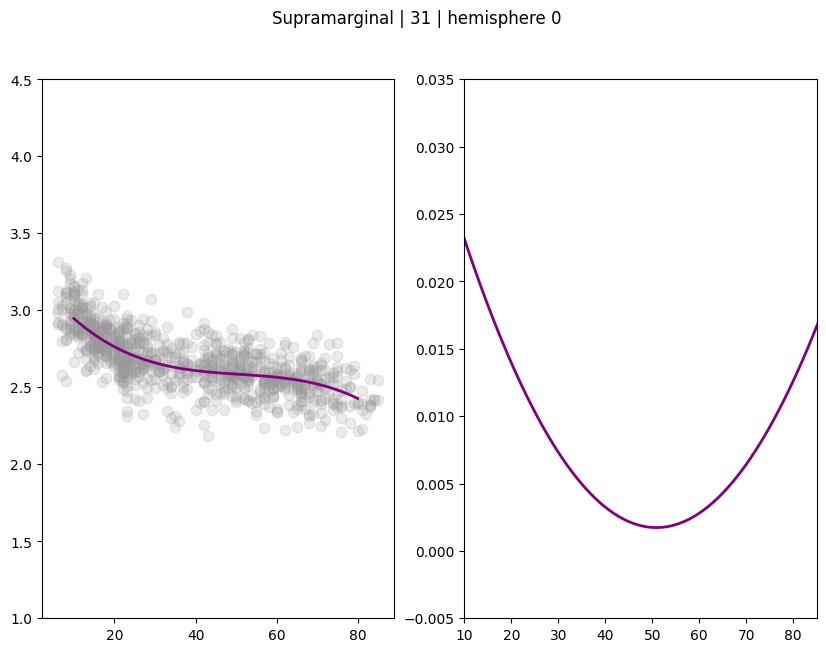

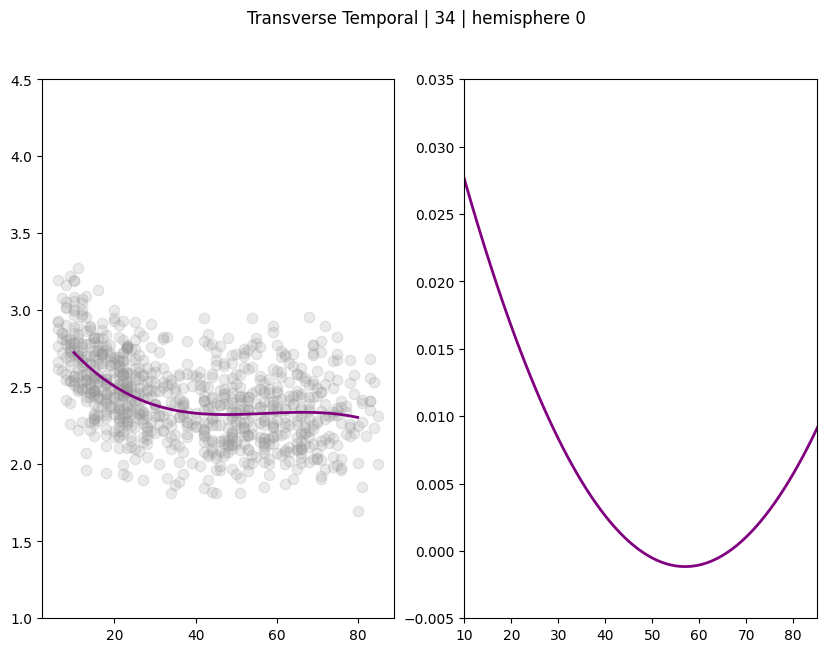

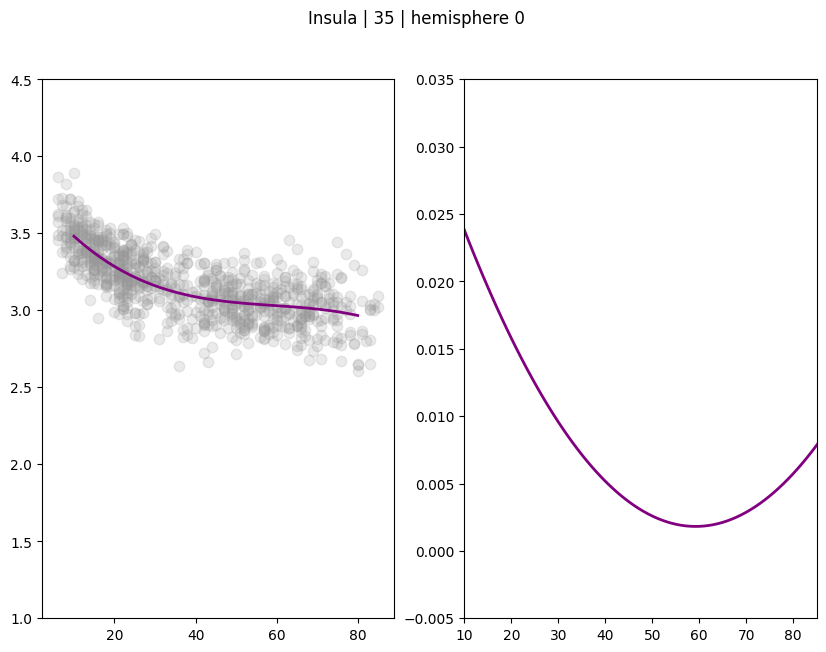

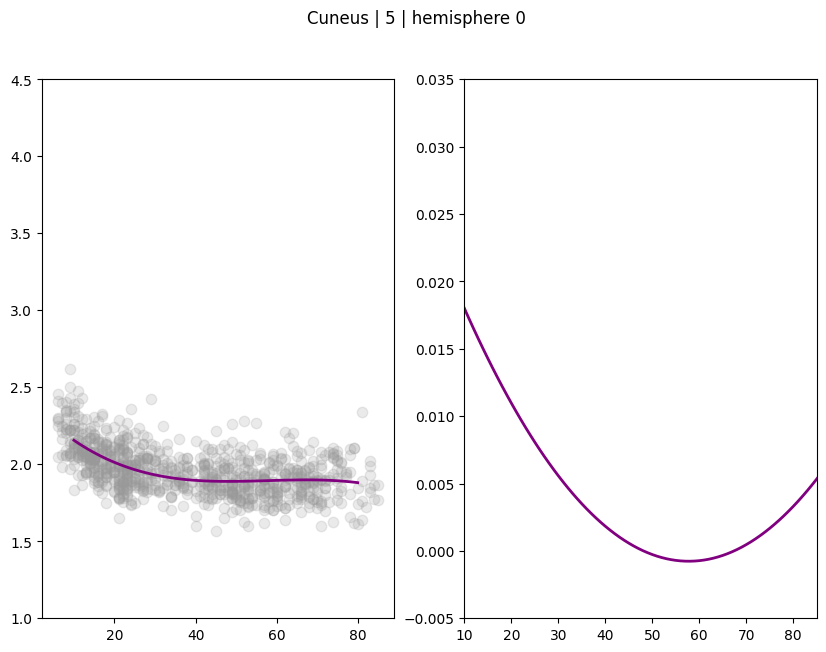

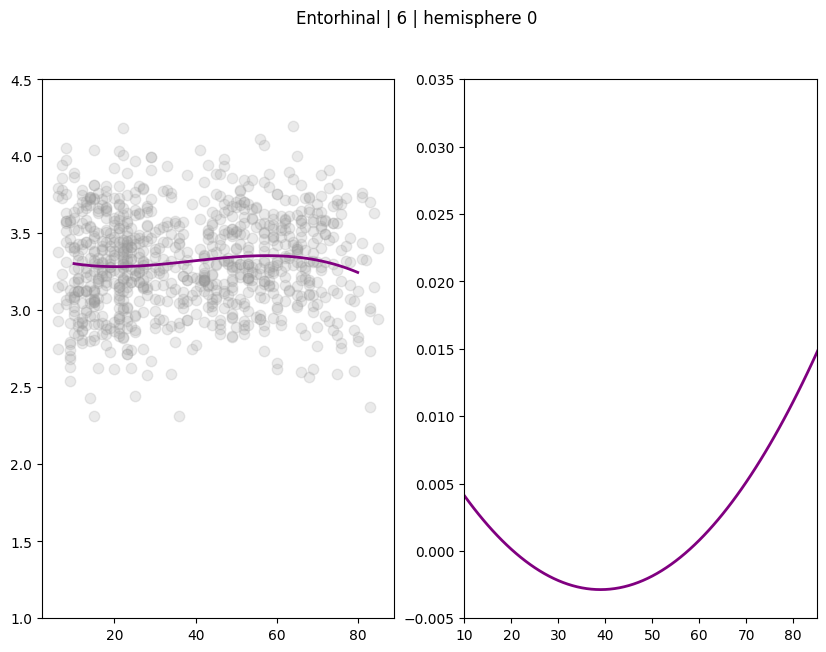

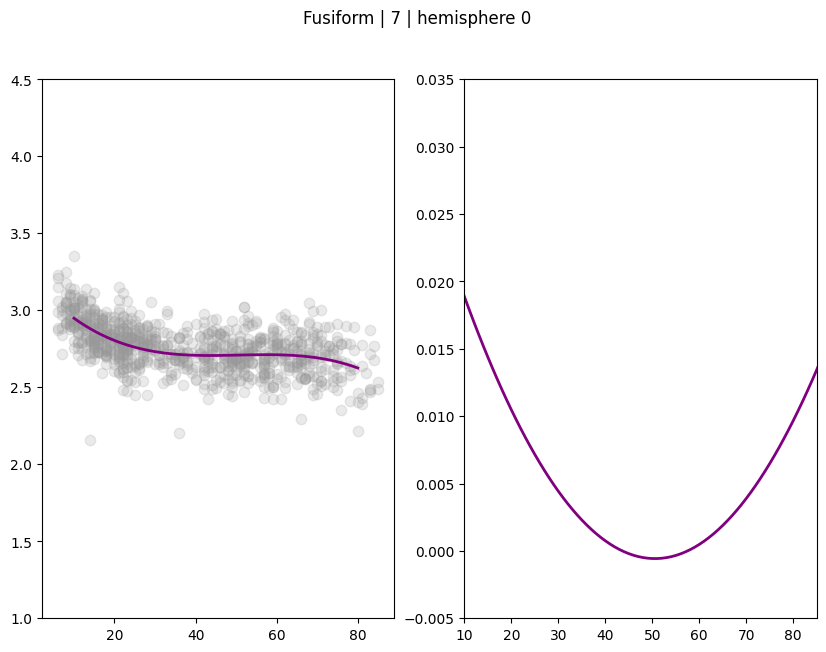

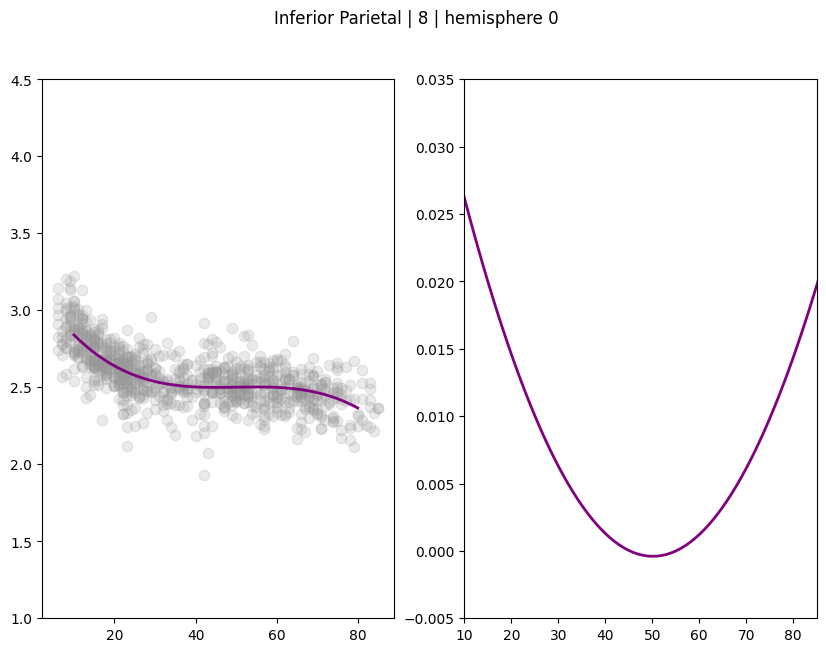

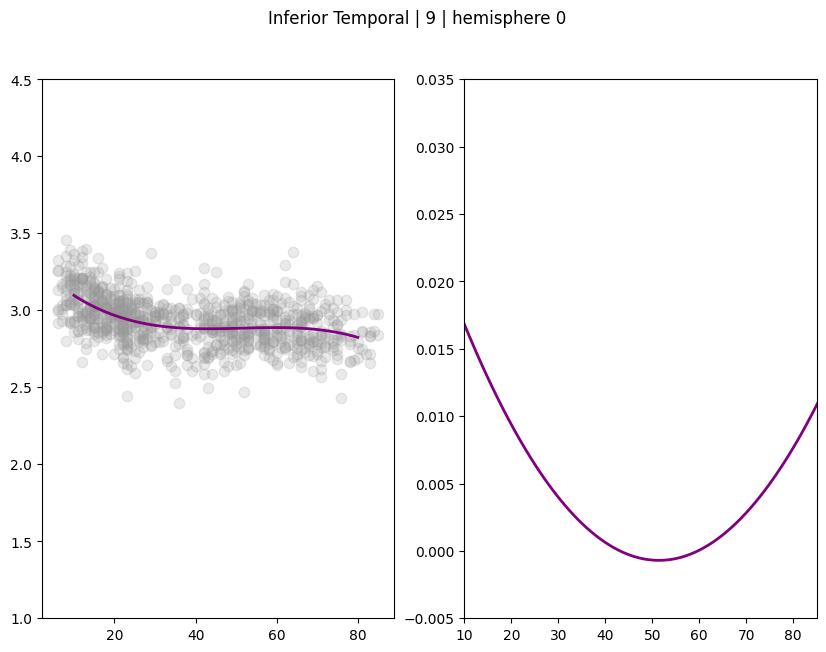

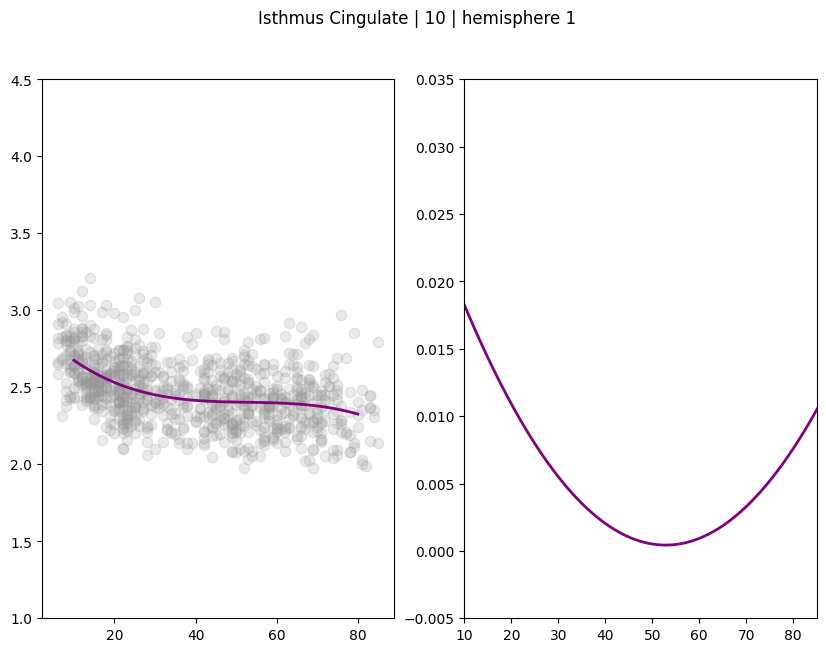

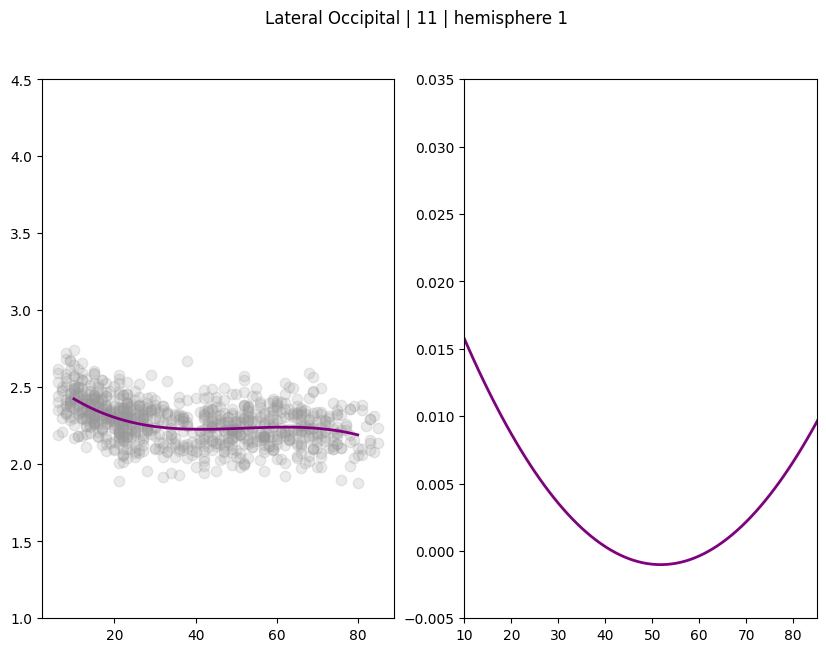

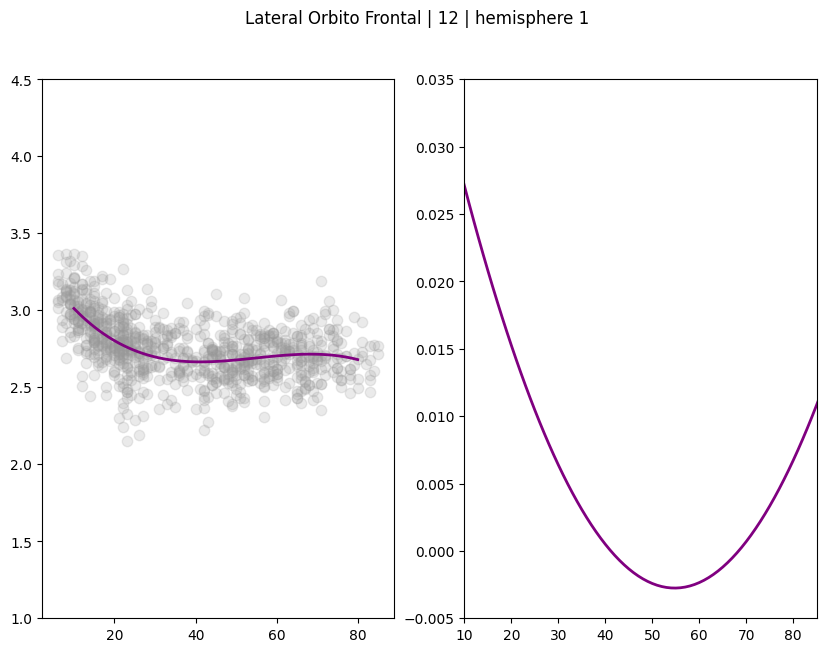

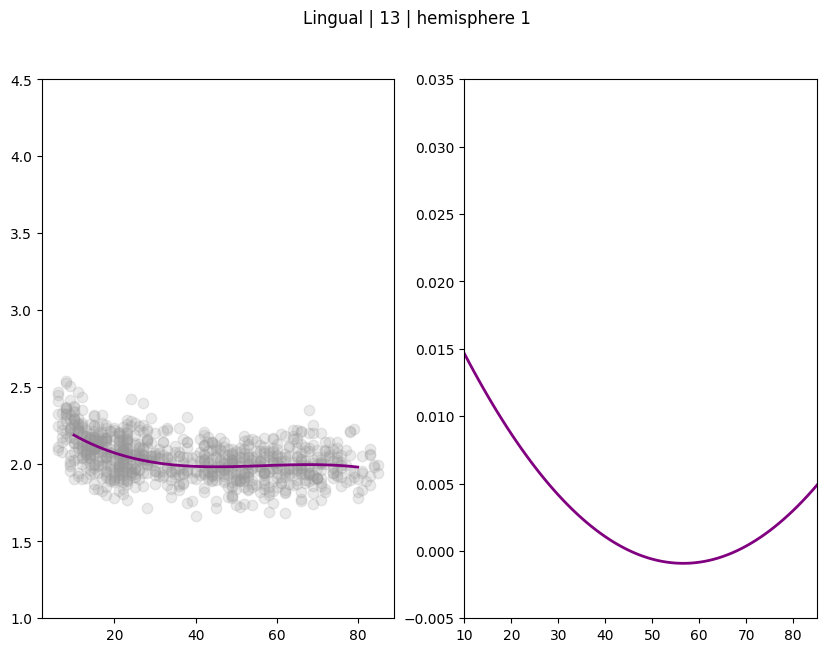

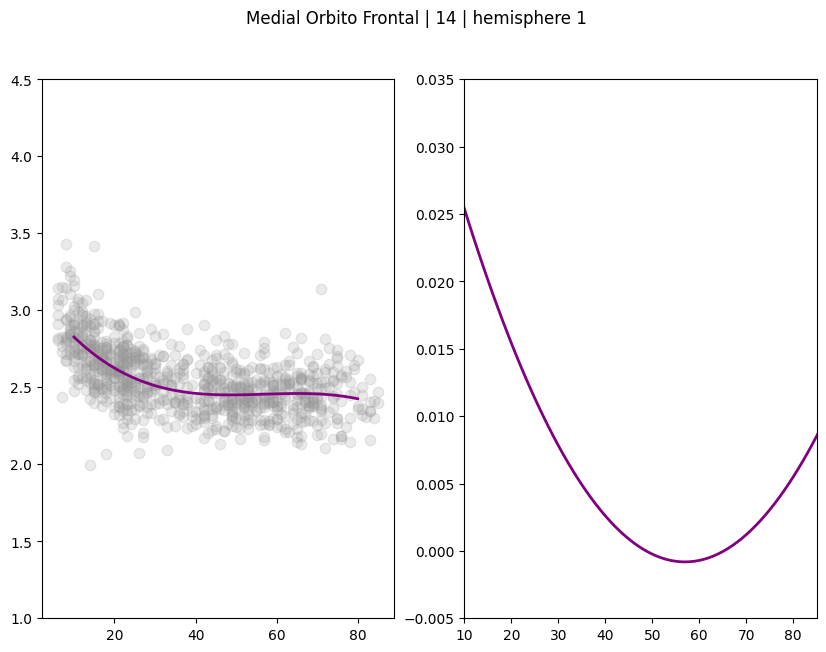

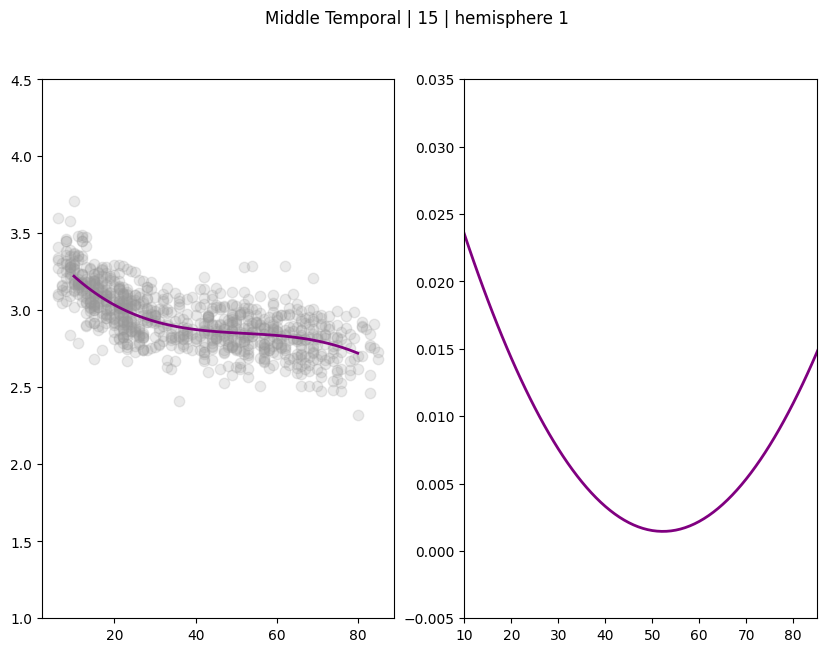

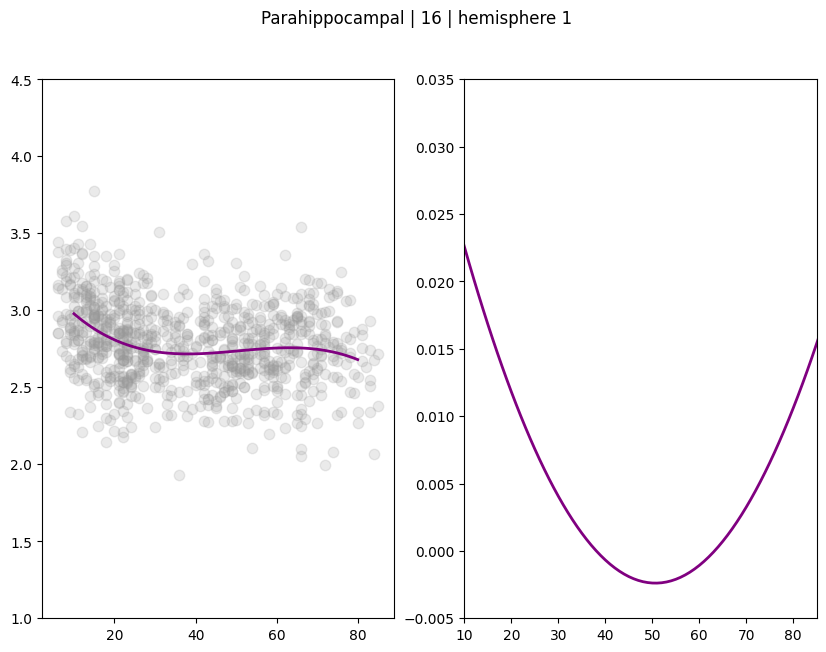

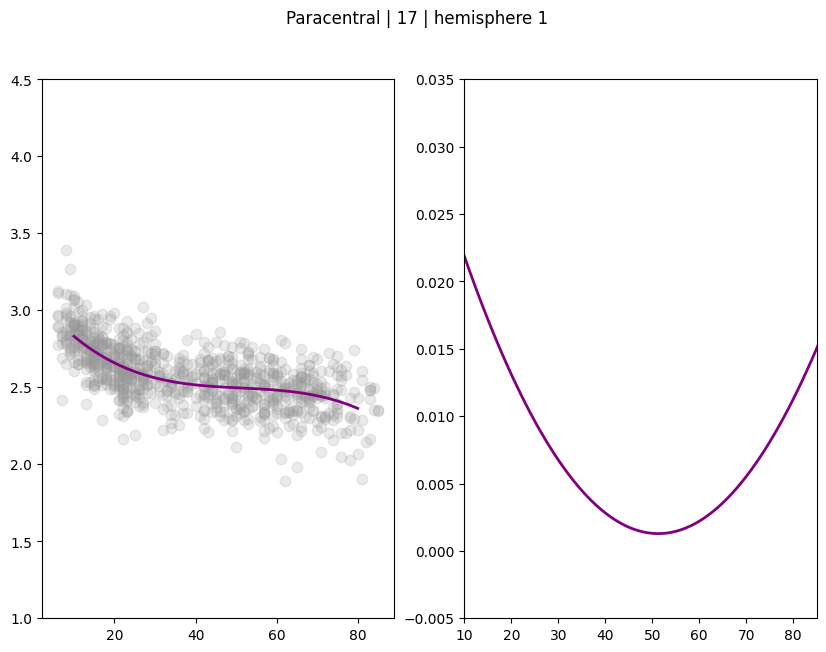

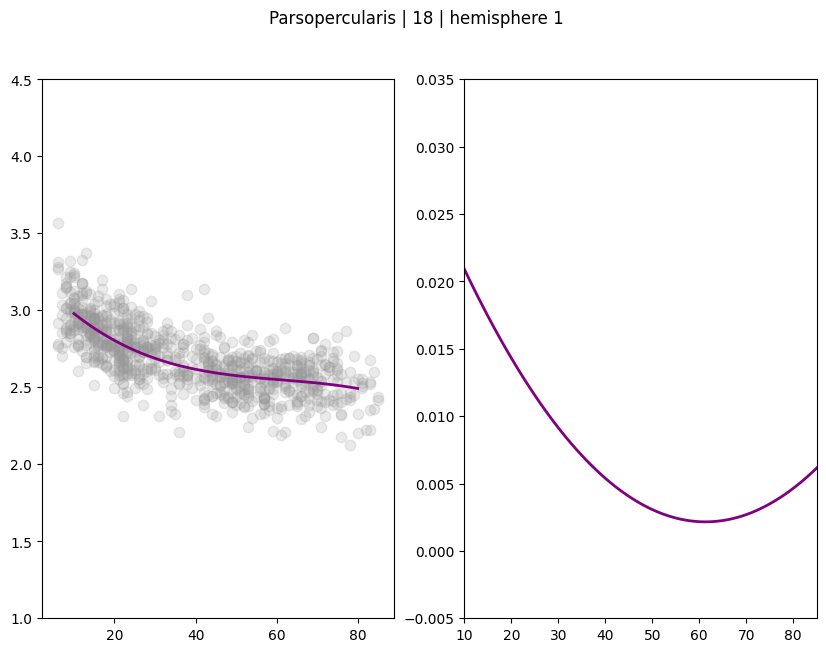

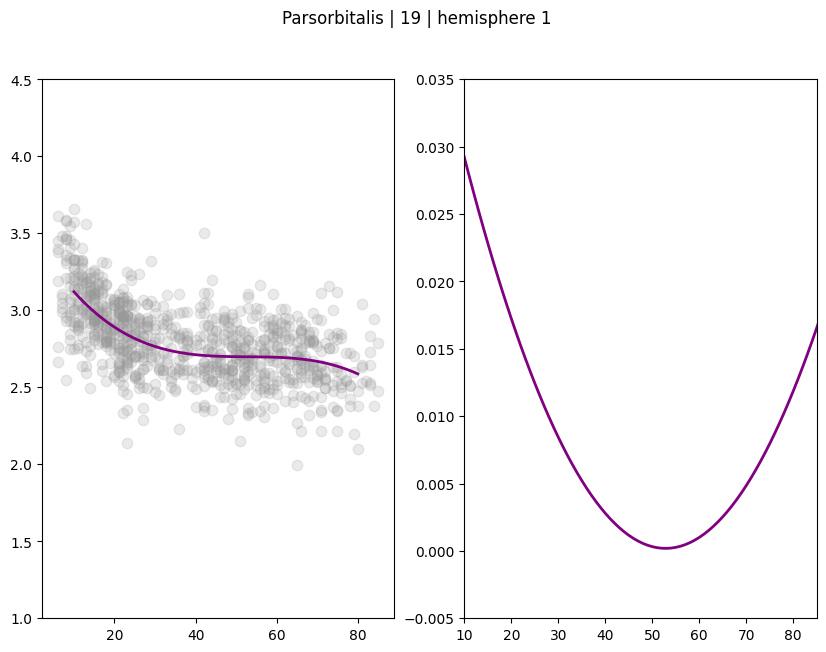

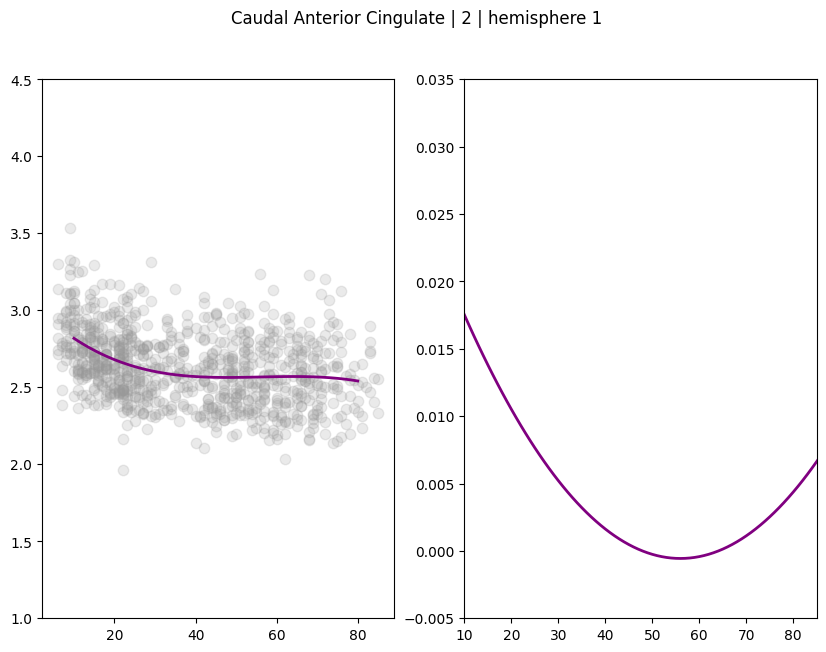

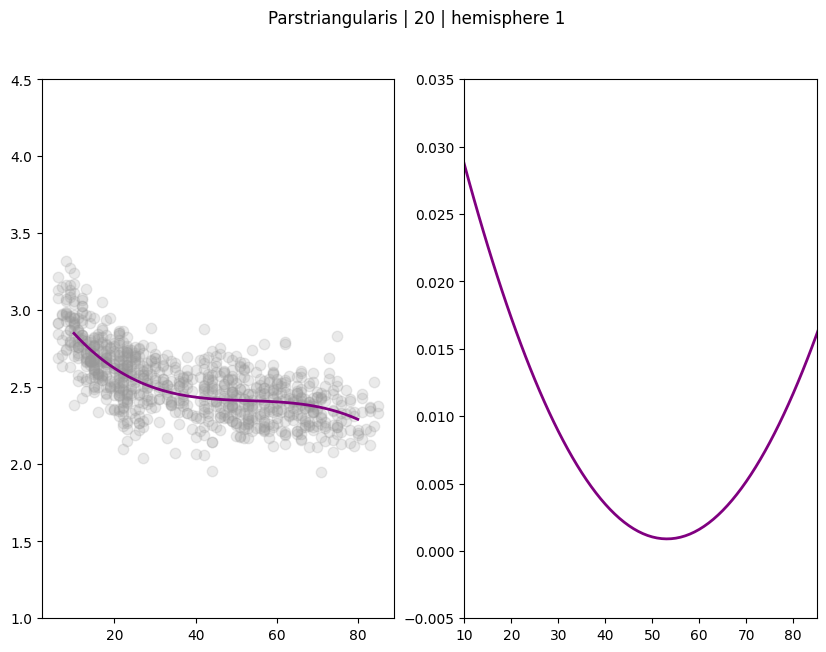

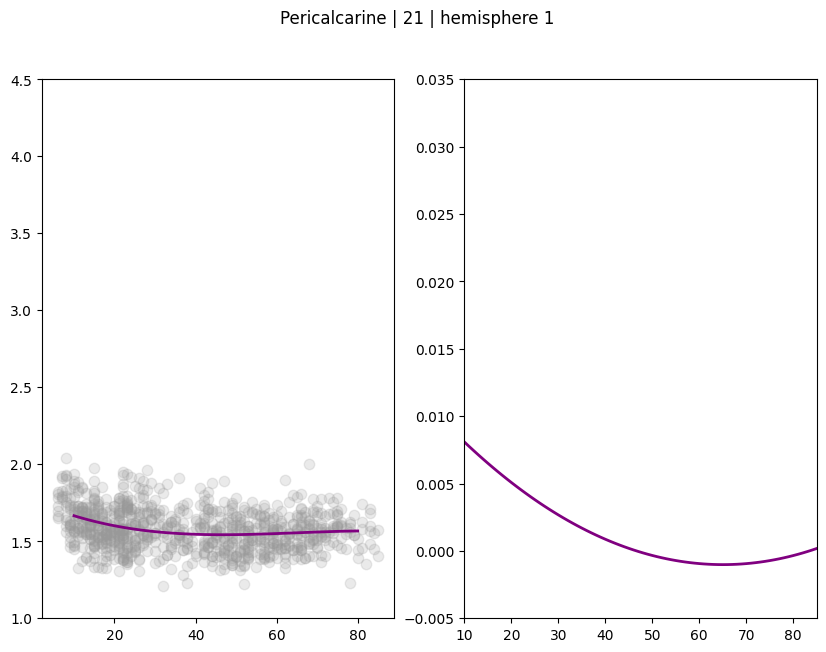

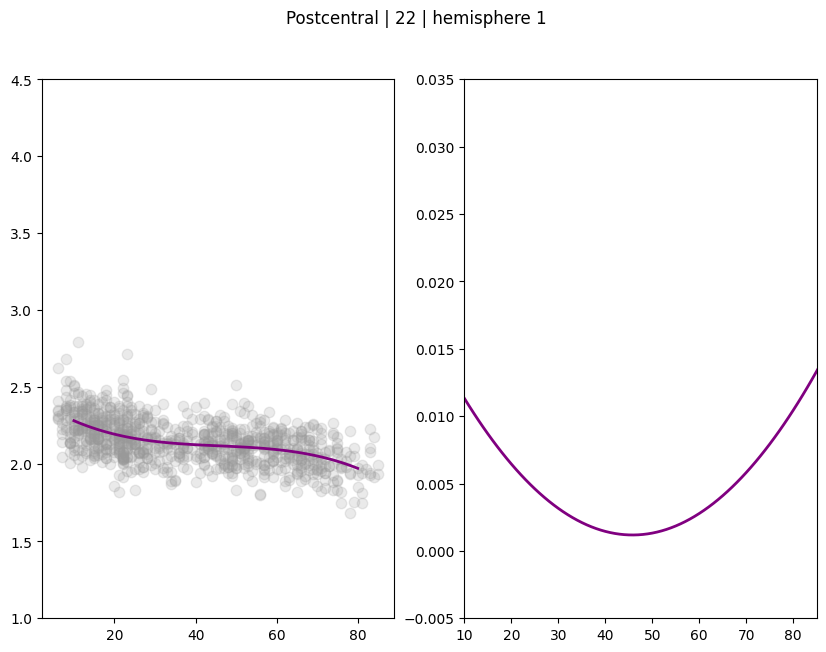

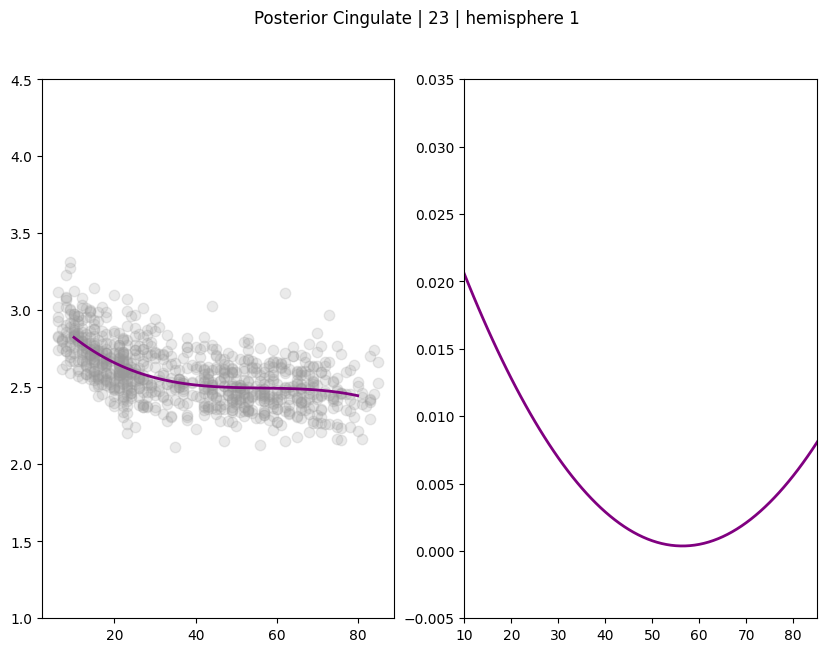

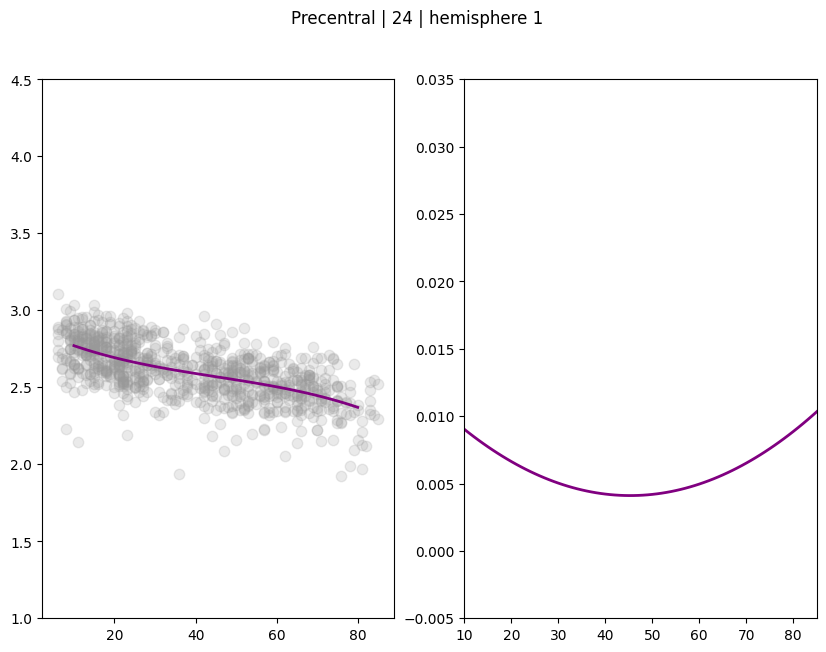

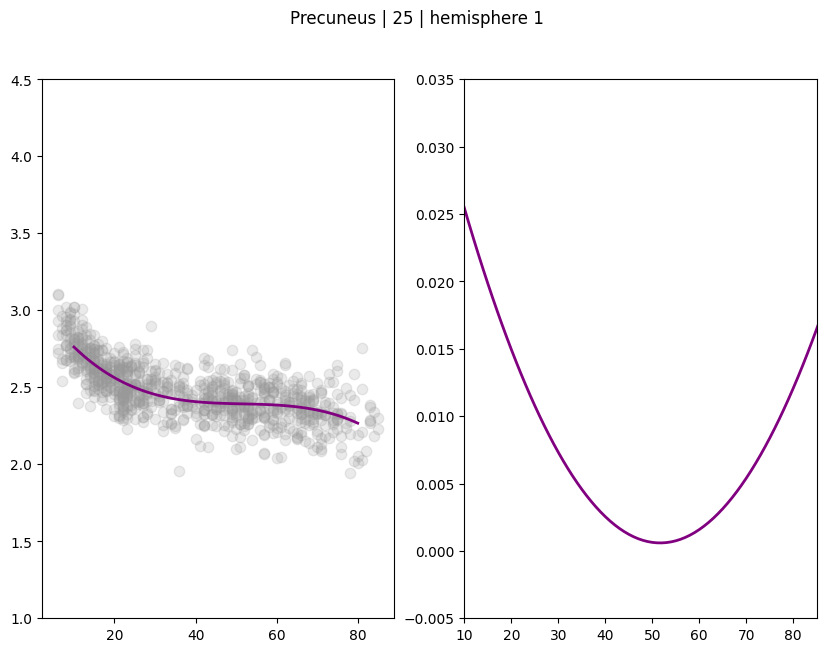

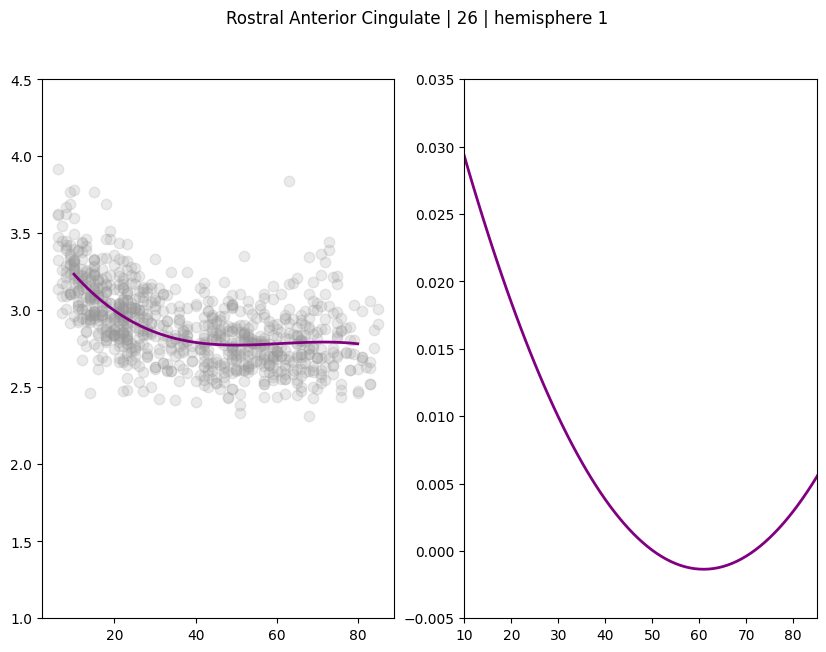

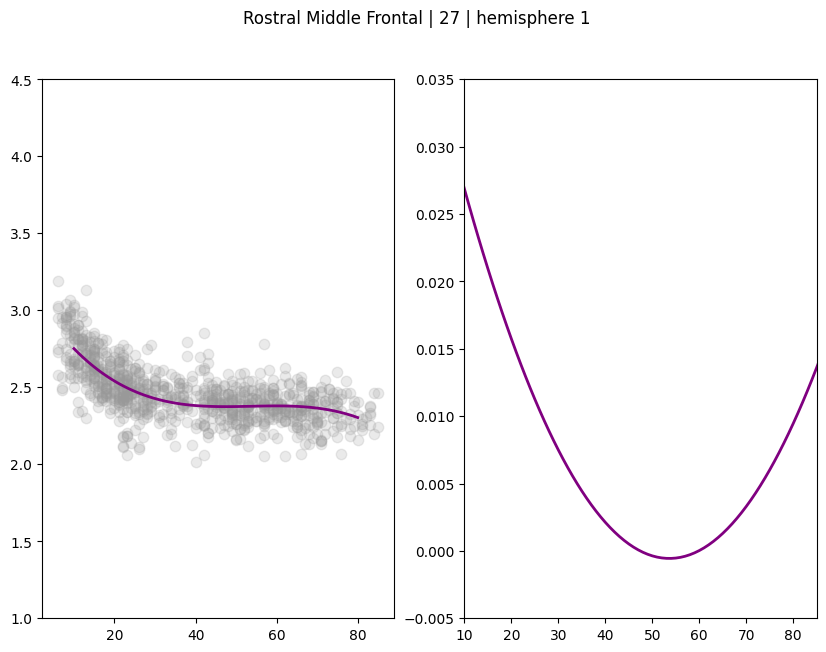

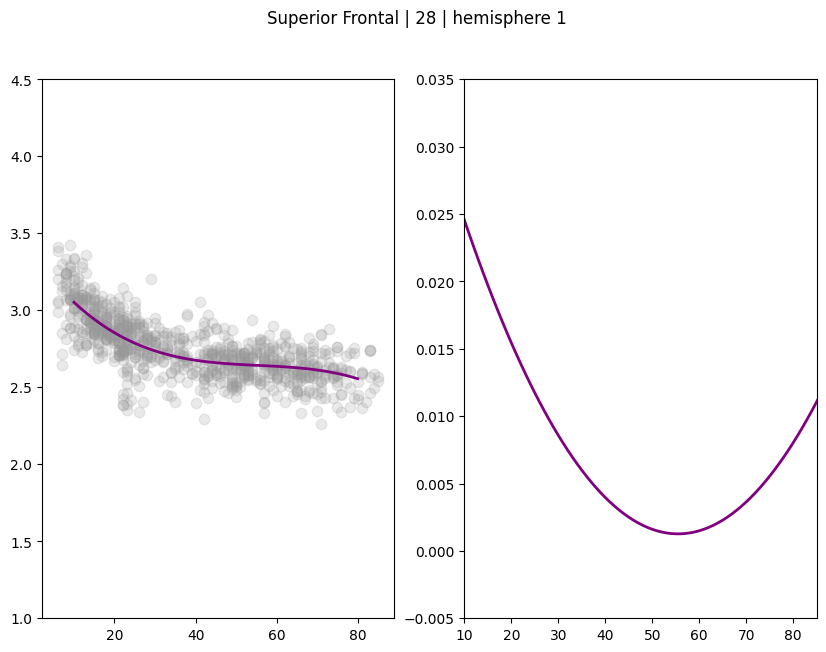

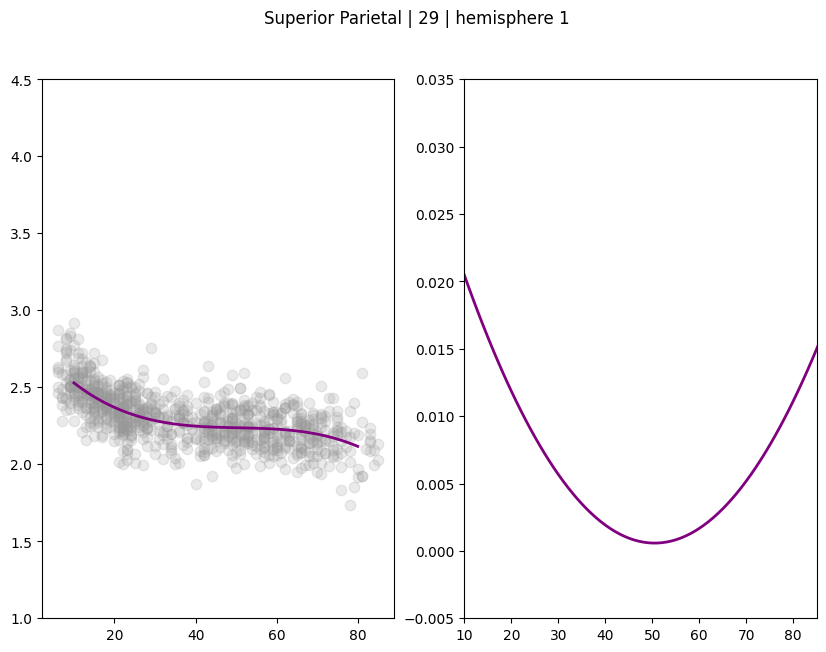

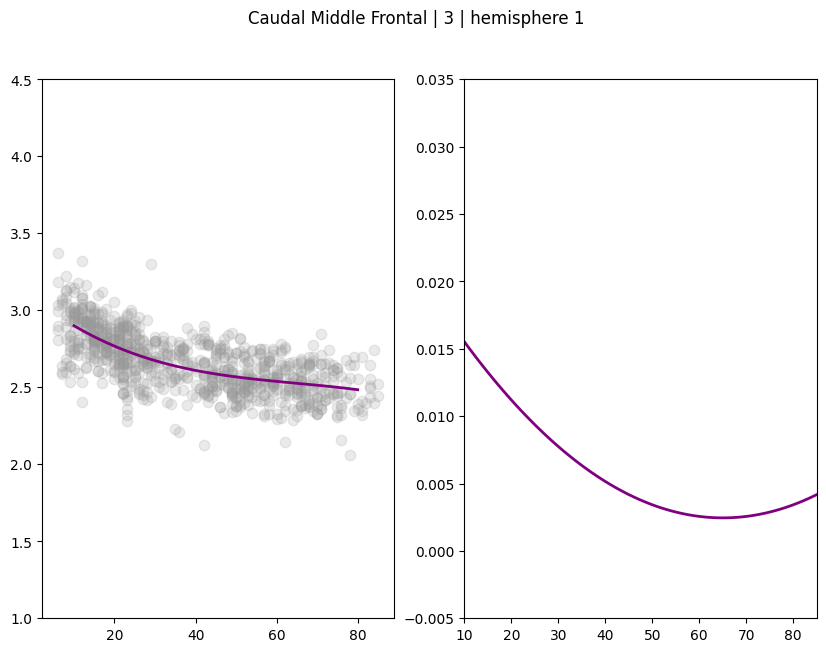

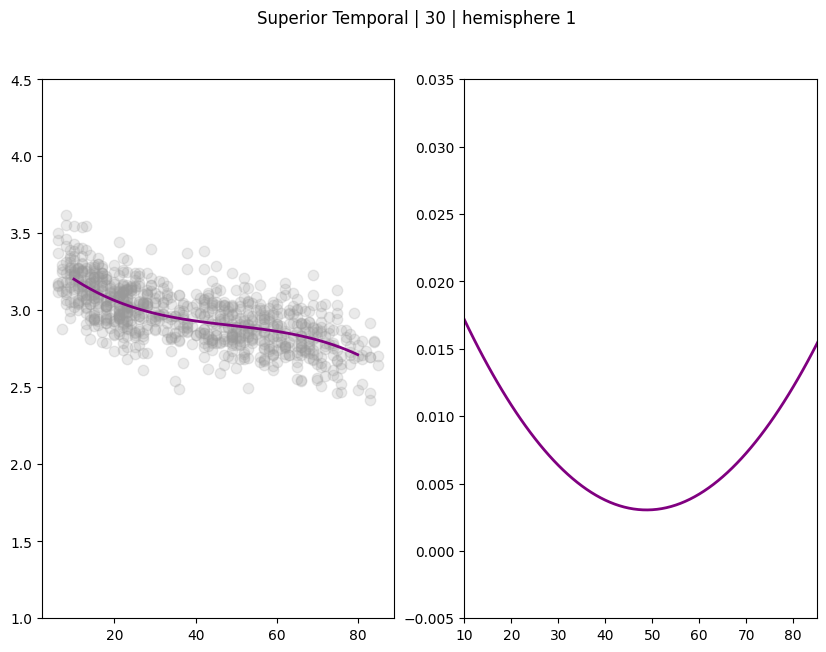

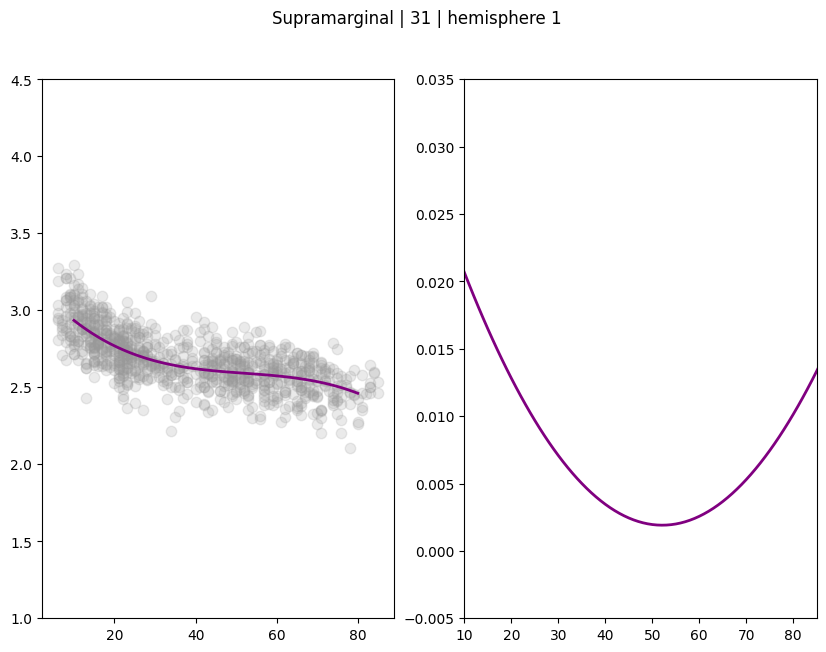

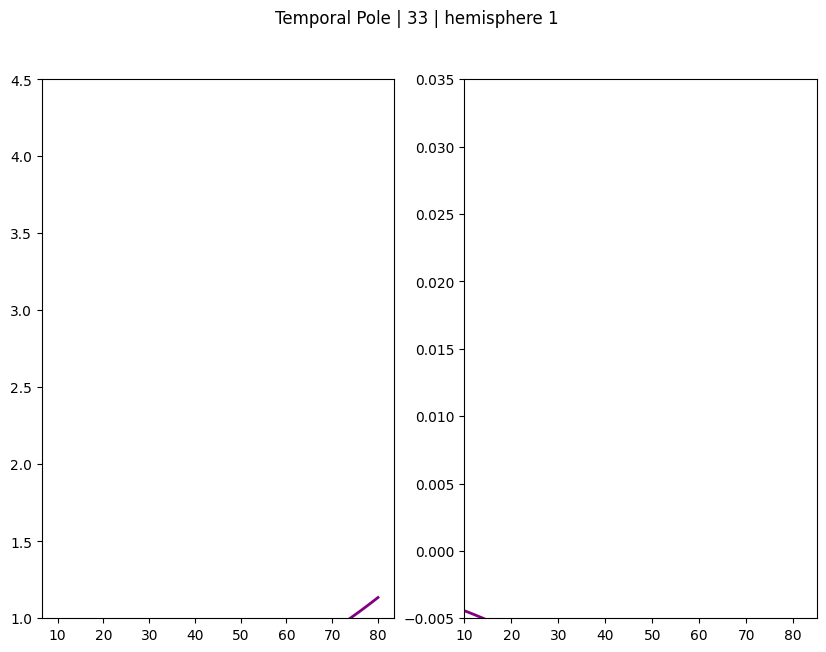

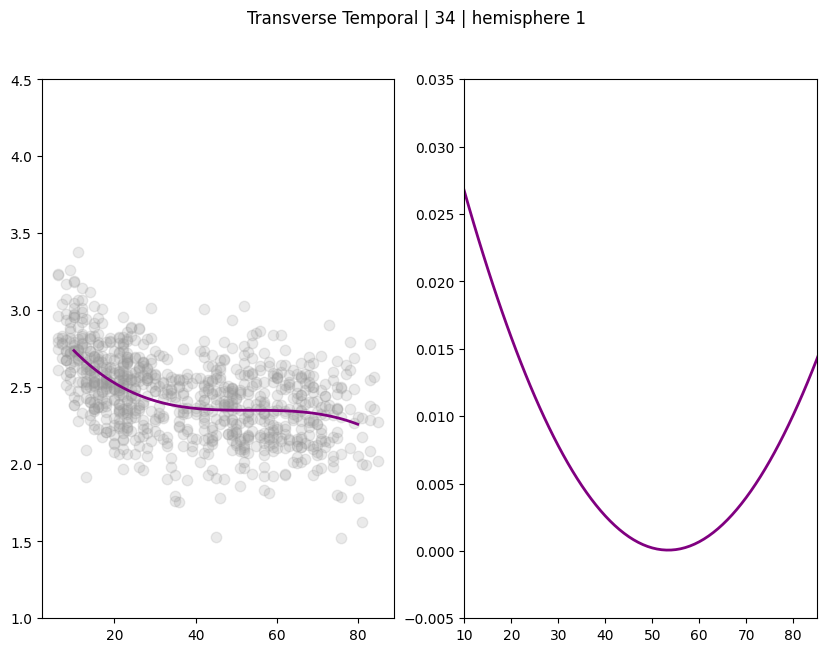

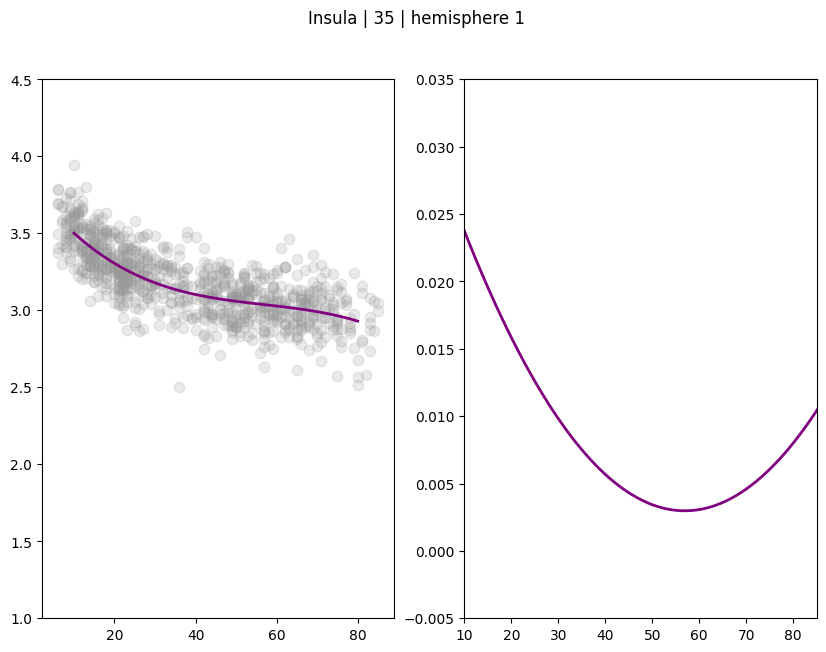

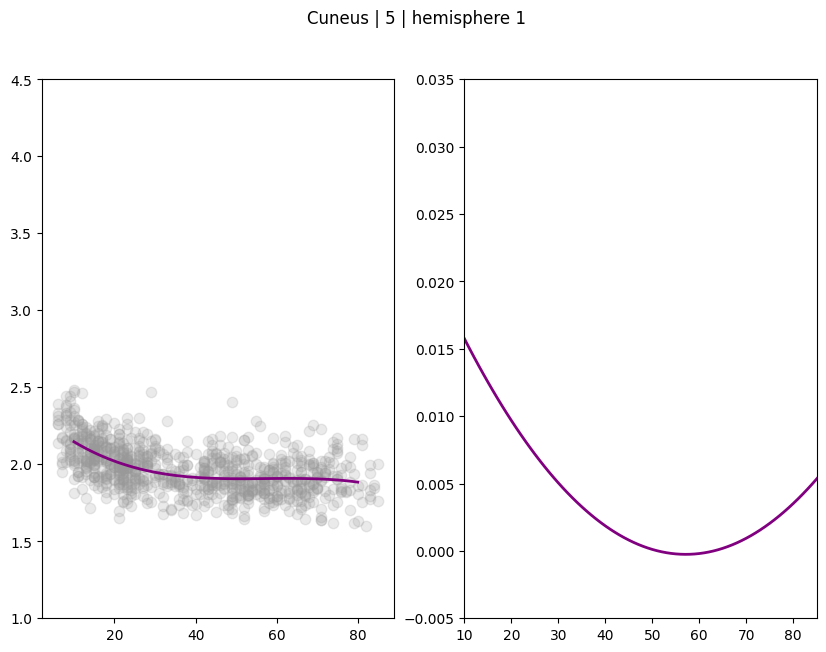

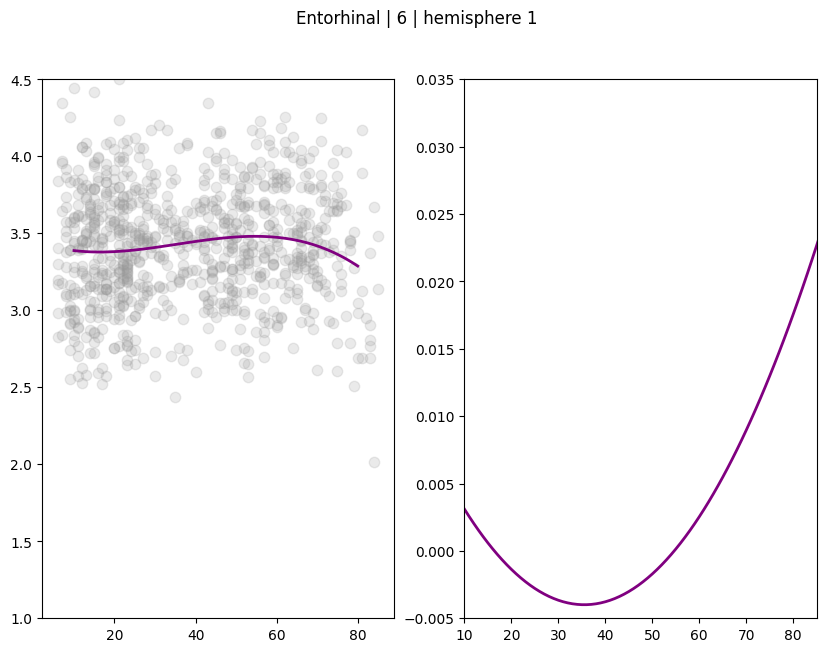

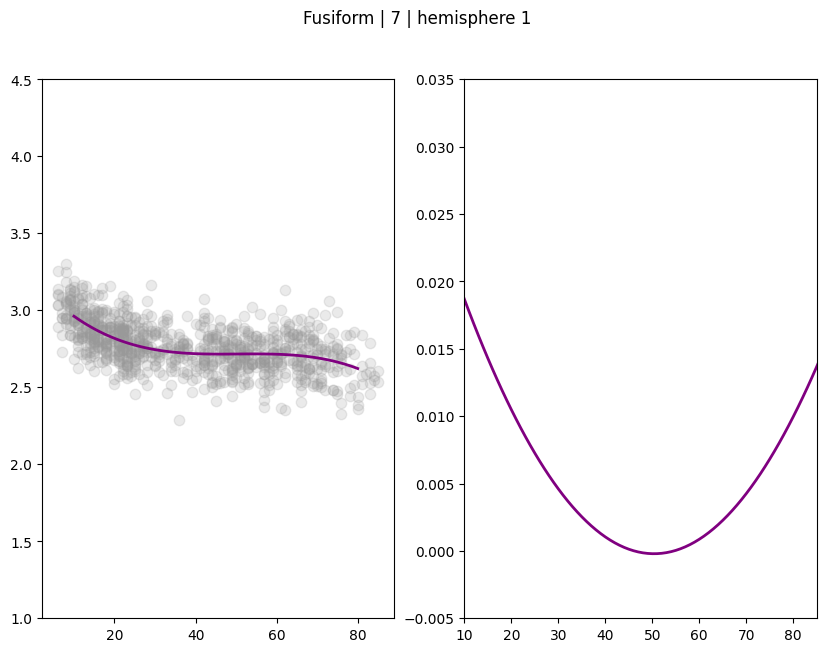

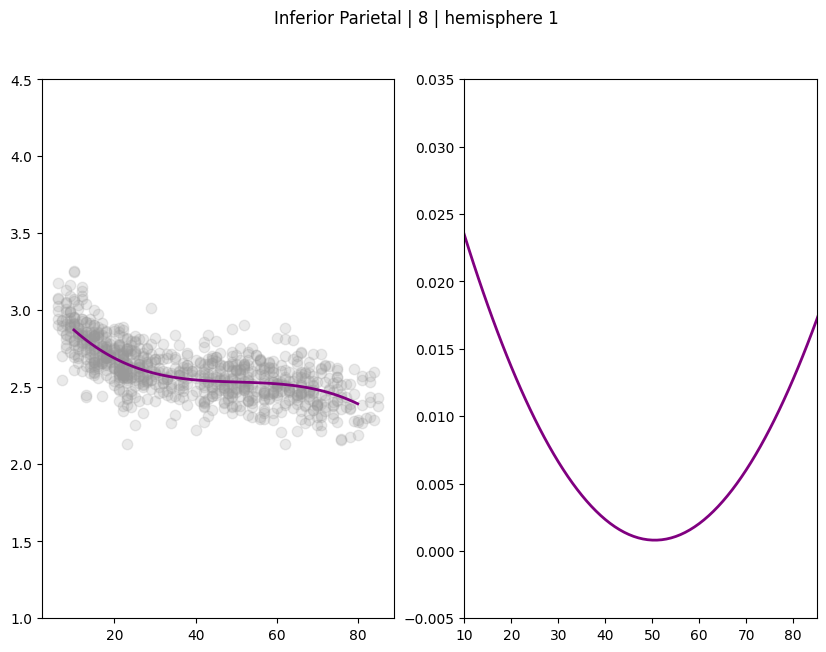

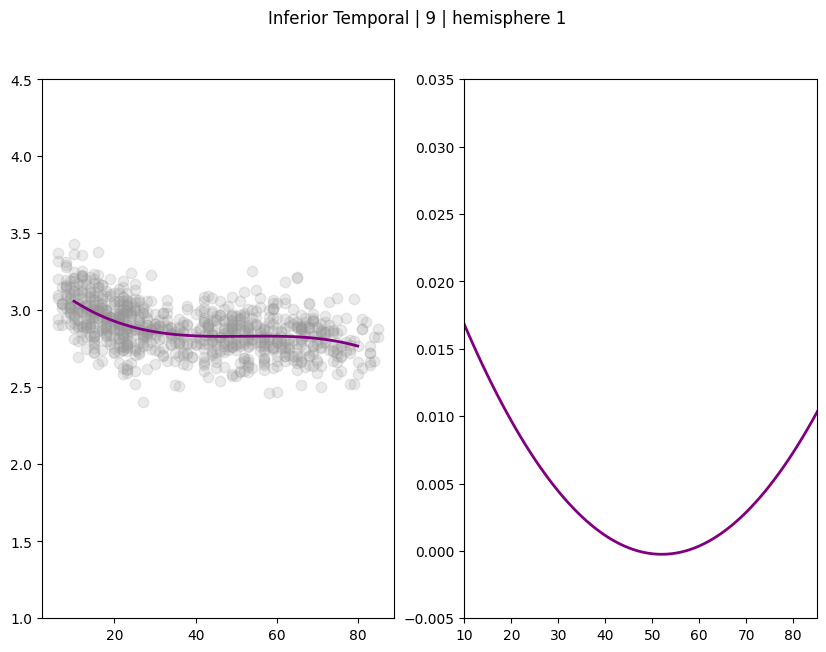

In [7]:
tp.reg_polynomial(df,plots=True)

### •  What is the difference in thinning by lobules?

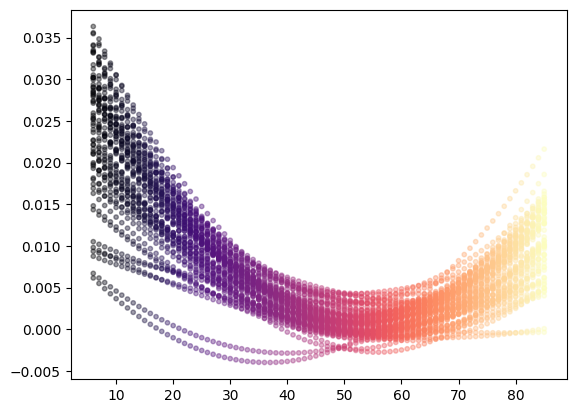

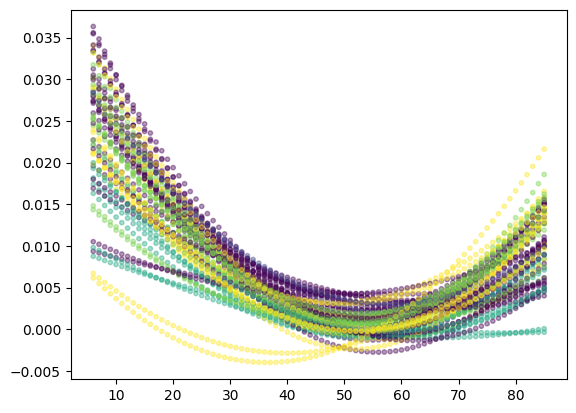

In [8]:
tp.plot_all_thinning(df1)

### •  Which structure gets thicker with aging?

In [9]:
tp.find_positive_structures(df1, rate=-0.002)

Percentage of thickness positive variation : 0.01471774193548387
Structures of thickness positive variation : ['Entorhinal' 'Lateral Orbito Frontal' 'Parahippocampal']


structure_name  atlas  Hemisphere   Age  anual_rate
2184     Entorhinal    6.0         0.0  30.0   -0.002046
2185     Entorhinal    6.0         0.0  31.0   -0.002203
2186     Entorhinal    6.0         0.0  32.0   -0.002343
2187     Entorhinal    6.0         0.0  33.0   -0.002467
2188     Entorhinal    6.0         0.0  34.0   -0.002575
...             ...    ...         ...   ...         ...
4680     Entorhinal    6.0         1.0  46.0   -0.003014
4681     Entorhinal    6.0         1.0  47.0   -0.002796
4682     Entorhinal    6.0         1.0  48.0   -0.002557
4683     Entorhinal    6.0         1.0  49.0   -0.002296
4684     Entorhinal    6.0         1.0  50.0   -0.002013

[73 rows x 5 columns]